In [3]:
import pandas as pd
import numpy as np

##### Processing climate data

In [2]:
cl1 = pd.read_excel("C:\\Users\\harry\\OneDrive\\Desktop\\Master Thesis\\Data\\Climate XLSX\\climate_room_01.xlsx", header = None, names = ['GrowRoom', 'TimeStamp', 'Attribute', 'Value'])
cl2 = pd.read_excel("C:\\Users\\harry\\OneDrive\\Desktop\\Master Thesis\\Data\\Climate XLSX\\climate_room_02.xlsx", header = None, names = ['GrowRoom', 'TimeStamp', 'Attribute', 'Value'])
cl3 = pd.read_excel("C:\\Users\\harry\\OneDrive\\Desktop\\Master Thesis\\Data\\Climate XLSX\\climate_room_03.xlsx", header = None, names = ['GrowRoom', 'TimeStamp', 'Attribute', 'Value'])
cl4 = pd.read_excel("C:\\Users\\harry\\OneDrive\\Desktop\\Master Thesis\\Data\\Climate XLSX\\climate_room_04.xlsx", header = None, names = ['GrowRoom', 'TimeStamp', 'Attribute', 'Value'])
cl5 = pd.read_excel("C:\\Users\\harry\\OneDrive\\Desktop\\Master Thesis\\Data\\Climate XLSX\\climate_room_05.xlsx", header = None, names = ['GrowRoom', 'TimeStamp', 'Attribute', 'Value'])
cl6 = pd.read_excel("C:\\Users\\harry\\OneDrive\\Desktop\\Master Thesis\\Data\\Climate XLSX\\climate_room_06.xlsx", header = None, names = ['GrowRoom', 'TimeStamp', 'Attribute', 'Value'])
cl7 = pd.read_excel("C:\\Users\\harry\\OneDrive\\Desktop\\Master Thesis\\Data\\Climate XLSX\\climate_room_07.xlsx", header = None, names = ['GrowRoom', 'TimeStamp', 'Attribute', 'Value'])
cl8 = pd.read_excel("C:\\Users\\harry\\OneDrive\\Desktop\\Master Thesis\\Data\\Climate XLSX\\climate_room_08.xlsx", header = None, names = ['GrowRoom', 'TimeStamp', 'Attribute', 'Value'])
cl9 = pd.read_excel("C:\\Users\\harry\\OneDrive\\Desktop\\Master Thesis\\Data\\Climate XLSX\\climate_room_09.xlsx", header = None, names = ['GrowRoom', 'TimeStamp', 'Attribute', 'Value'])
cl10 = pd.read_excel("C:\\Users\\harry\\OneDrive\\Desktop\\Master Thesis\\Data\\Climate XLSX\\climate_room_10.xlsx", header = None, names = ['GrowRoom', 'TimeStamp', 'Attribute', 'Value'])
cl11 = pd.read_excel("C:\\Users\\harry\\OneDrive\\Desktop\\Master Thesis\\Data\\Climate XLSX\\climate_room_11.xlsx", header = None, names = ['GrowRoom', 'TimeStamp', 'Attribute', 'Value'])
cl12 = pd.read_excel("C:\\Users\\harry\\OneDrive\\Desktop\\Master Thesis\\Data\\Climate XLSX\\climate_room_12.xlsx", header = None, names = ['GrowRoom', 'TimeStamp', 'Attribute', 'Value'])
cl13 = pd.read_excel("C:\\Users\\harry\\OneDrive\\Desktop\\Master Thesis\\Data\\Climate XLSX\\climate_room_13.xlsx", header = None, names = ['GrowRoom', 'TimeStamp', 'Attribute', 'Value'])
cl14 = pd.read_excel("C:\\Users\\harry\\OneDrive\\Desktop\\Master Thesis\\Data\\Climate XLSX\\climate_room_14.xlsx", header = None, names = ['GrowRoom', 'TimeStamp', 'Attribute', 'Value'])
cl15 = pd.read_excel("C:\\Users\\harry\\OneDrive\\Desktop\\Master Thesis\\Data\\Climate XLSX\\climate_room_15.xlsx", header = None, names = ['GrowRoom', 'TimeStamp', 'Attribute', 'Value'])

In [3]:
climate_data = pd.concat([cl1, cl2, cl3, cl4, cl5, cl6, cl7, cl8, cl9, cl10, cl11, cl12, cl13, cl14, cl15], ignore_index=True)
display(climate_data)

,GrowRoom,TimeStamp,Attribute,Value
0,Grow room 01,2022-08-24 00:00:00,Temperature,20.8
1,Grow room 01,2022-08-24 00:07:00,Temperature,20.9
2,Grow room 01,2022-08-24 00:08:00,Temperature,20.8
3,Grow room 01,2022-08-24 00:14:00,Temperature,20.9
4,Grow room 01,2022-08-24 00:17:00,Temperature,21.0
...,...,...,...,...
10312251,Grow room 15,2023-03-30 09:09:00,Humidity,11.0
10312252,Grow room 15,2023-03-30 09:13:00,Humidity,10.8
10312253,Grow room 15,2023-03-30 09:15:00,Humidity,11.0
10312254,Grow room 15,2023-03-30 09:17:00,Humidity,11.1


In [4]:
climate_data['Date'] = climate_data['TimeStamp'].dt.date
climate_data = climate_data.drop(['TimeStamp'], axis = 1)
climate_data.fillna(0)
climate_data_new = pd.pivot_table(climate_data, index = ['GrowRoom', 'Date'], columns='Attribute', values='Value')
climate_data_new_temp = pd.pivot_table(climate_data, index = ['GrowRoom', 'Date'], columns='Attribute', values='Value', aggfunc = ('mean', 'min', 'max'))

calc_temp = climate_data_new_temp.xs('Temperature', level=1, axis=1)
climate_data_new['Max Temperature'] = calc_temp['max']
climate_data_new['Mean Temperature'] = calc_temp['mean']
climate_data_new['Min Temperature'] = calc_temp['min']
climate_data_new = climate_data_new.reset_index()
climate_data_new.drop(['Temperature'], axis = 1, inplace = True)
climate_data_new

Attribute,GrowRoom,Date,Humidity,Relative humidity,co2,Max Temperature,Mean Temperature,Min Temperature
0,Grow room 01,2022-08-24,11.776339,78.697109,961.271472,21.5,19.814783,15.6
1,Grow room 01,2022-08-25,11.966192,80.388316,960.553919,21.4,19.746855,15.7
2,Grow room 01,2022-08-26,12.287526,80.997065,941.650596,22.1,20.115056,15.6
3,Grow room 01,2022-08-27,12.481609,81.783813,949.546223,21.9,20.111338,15.7
4,Grow room 01,2022-08-28,12.455323,82.479554,976.956923,21.6,19.853982,15.8
...,...,...,...,...,...,...,...,...
3220,Grow room 15,2023-03-26,13.281465,83.131048,1109.403141,22.3,21.303377,17.4
3221,Grow room 15,2023-03-27,13.228838,82.661264,1049.803295,22.5,21.350312,17.3
3222,Grow room 15,2023-03-28,13.258907,81.995798,992.237768,22.7,21.328200,17.2
3223,Grow room 15,2023-03-29,12.703559,81.711370,971.239617,22.6,20.788124,17.3


In [5]:
display(climate_data_new)
print(climate_data_new.isnull().sum())

Attribute,GrowRoom,Date,Humidity,Relative humidity,co2,Max Temperature,Mean Temperature,Min Temperature
0,Grow room 01,2022-08-24,11.776339,78.697109,961.271472,21.5,19.814783,15.6
1,Grow room 01,2022-08-25,11.966192,80.388316,960.553919,21.4,19.746855,15.7
2,Grow room 01,2022-08-26,12.287526,80.997065,941.650596,22.1,20.115056,15.6
3,Grow room 01,2022-08-27,12.481609,81.783813,949.546223,21.9,20.111338,15.7
4,Grow room 01,2022-08-28,12.455323,82.479554,976.956923,21.6,19.853982,15.8
...,...,...,...,...,...,...,...,...
3220,Grow room 15,2023-03-26,13.281465,83.131048,1109.403141,22.3,21.303377,17.4
3221,Grow room 15,2023-03-27,13.228838,82.661264,1049.803295,22.5,21.350312,17.3
3222,Grow room 15,2023-03-28,13.258907,81.995798,992.237768,22.7,21.328200,17.2
3223,Grow room 15,2023-03-29,12.703559,81.711370,971.239617,22.6,20.788124,17.3


Attribute
GrowRoom               0
Date                   0
Humidity              85
Relative humidity      0
co2                  124
Max Temperature        0
Mean Temperature       0
Min Temperature        0
dtype: int64


##### Processing manual data 

In [6]:
manual_data = pd.read_excel("C:\\Users\\harry\\OneDrive\\Desktop\\Master Thesis\\Data\\manual_data2.xlsx", header = None, names = ['ID', 'GrowRoom', 'Date', 'DAT', 'BatchID', 'SeedType', 'Attribute', 'Value', 'Wagon', 'PlantPos'])
manual_data['Date'] = manual_data['Date'].dt.date
print(manual_data.isnull().sum())
manual_data = manual_data.drop(['ID', 'Wagon', 'PlantPos'], axis = 1)
manual_new = pd.pivot_table(manual_data, index = ['GrowRoom', 'Date', 'DAT', 'BatchID', 'SeedType'], columns='Attribute', values='Value')
manual_new = manual_new.reset_index()
manual_new = manual_new.drop(['Air_Temperature', 'Humidity', 'air_temperature', 'humidity', 'Leaf_Count', 'Leaf_Temperature', 'Plant_Height', 'Weight', 'leaf_temperature', 'leaf_vpd', 'Roots_EC', 'Roots_Temperature', 'canopy_area'], axis = 1)
display(manual_new)
print(manual_new.isnull().sum())

ID              0
GrowRoom        0
Date            0
DAT             0
BatchID         0
SeedType        0
Attribute       0
Value           0
Wagon        5842
PlantPos     8874
dtype: int64


Attribute,GrowRoom,Date,DAT,BatchID,SeedType,Weight_Packable,Weight_Waste
0,A1,2022-09-13,5,10021038,Exanimo,NaN,NaN
1,A1,2022-09-13,5,10021038,Zac,NaN,NaN
2,A1,2023-01-04,14,10021117,Crystal lettuce,0.453333,NaN
3,A1,2023-01-04,14,10021117,Incised lettuce,5.901111,NaN
4,A1,2023-01-04,14,10021117,Zac,0.474444,NaN
...,...,...,...,...,...,...,...
794,Grow room 15,2023-03-01,7,10021154,Zac,8.388889,0.000000
795,Grow room 15,2023-03-06,12,10021154,Exanimo,35.300000,1.033333
796,Grow room 15,2023-03-06,12,10021154,Zac,27.233333,0.000000
797,Grow room 15,2023-03-09,15,10021154,Exanimo,79.200000,2.766667


Attribute
GrowRoom             0
Date                 0
DAT                  0
BatchID              0
SeedType             0
Weight_Packable     54
Weight_Waste       154
dtype: int64


##### Processing water data 

In [7]:
water_data = pd.read_excel("C:\\Users\\harry\\OneDrive\\Desktop\\Master Thesis\\Data\\water_analysis_data.xlsx")
water_data['DateRecieved'] = water_data['DateRecieved'].dt.date
water_data['EndDate'] = water_data['EndDate'].dt.date
display(water_data)
print(water_data.isnull().sum())
water_data = water_data.drop(['AnalysisID', 'Alk', 'Cl', 'Zn', 'Mg', 'Mn', 'S', 'Mo', 'B', 'Al', 'Cu', 'Si', 'Na', 'Ni'], axis = 1)
water_data.rename(columns = {'DateRecieved' : 'Date'}, inplace = True)

,AnalysisID,DateRecieved,EndDate,GrowZone,GrowRoom,pH,EC,Alk,K,Cl,...,B,Al,NH4-N,Ca,Cu,Si,Na,Fe,Ni,P
0,206,2022-09-21,2022-09-28,Grow Zone 1,(Room 1-5),6.28,2.70,0,409.68,0,...,1.04,0.02,1.590,193.07,0.21,10.84,47.07,1.37,0,53.34
1,207,2022-09-21,2022-09-28,Grow Zone 2,(Room 6-10),6.15,2.52,0,393.18,0,...,0.96,0.02,2.420,171.29,0.18,9.45,41.90,1.65,0,54.94
2,208,2022-09-21,2022-09-28,Grow Zone 3,(Room 11-15),6.20,2.60,0,446.54,0,...,0.80,0.02,0.930,164.63,0.15,7.52,34.18,1.54,0,52.80
3,203,2022-09-29,2022-10-04,Grow Zone 1,(Room 1-5),6.28,2.51,0,328.60,0,...,1.27,0.02,1.710,198.00,0.19,11.26,49.20,1.51,0,50.24
4,204,2022-09-29,2022-10-04,Grow Zone 2,(Room 6-10),5.97,2.59,0,388.13,0,...,1.13,0.02,1.790,186.85,0.18,10.04,42.87,1.35,0,57.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,5,2023-03-15,2023-03-21,Grow Zone 2,(Room 6-10),6.03,2.37,0,390.47,0,...,0.51,0.02,6.764,173.93,0.08,6.00,25.76,1.82,0,44.73
71,6,2023-03-15,2023-03-21,Grow Zone 3,(Room 11-15),6.28,2.33,0,379.50,0,...,0.85,0.00,2.492,178.76,0.13,7.62,32.97,1.44,0,44.73
72,1,2023-03-22,2023-03-29,Grow Zone 1,(Room 1-5),5.91,2.35,0,348.82,0,...,0.52,0.01,2.094,185.67,0.08,6.52,27.94,0.89,0,43.49
73,2,2023-03-22,2023-03-29,Grow Zone 2,(Room 6-10),6.37,2.18,0,375.89,0,...,0.60,0.02,5.589,146.51,0.09,6.07,25.36,2.09,0,33.24


AnalysisID      0
DateRecieved    0
EndDate         0
GrowZone        0
GrowRoom        0
pH              0
EC              0
Alk             0
K               0
Cl              0
Zn              0
Mg              0
Mn              0
Mo              0
NO3-N           0
S               0
B               0
Al              0
NH4-N           0
Ca              0
Cu              0
Si              0
Na              0
Fe              0
Ni              0
P               0
dtype: int64


In [8]:
water_data

,Date,EndDate,GrowZone,GrowRoom,pH,EC,K,NO3-N,NH4-N,Ca,Fe,P
0,2022-09-21,2022-09-28,Grow Zone 1,(Room 1-5),6.28,2.70,409.68,205.330,1.590,193.07,1.37,53.34
1,2022-09-21,2022-09-28,Grow Zone 2,(Room 6-10),6.15,2.52,393.18,202.510,2.420,171.29,1.65,54.94
2,2022-09-21,2022-09-28,Grow Zone 3,(Room 11-15),6.20,2.60,446.54,217.440,0.930,164.63,1.54,52.80
3,2022-09-29,2022-10-04,Grow Zone 1,(Room 1-5),6.28,2.51,328.60,199.110,1.710,198.00,1.51,50.24
4,2022-09-29,2022-10-04,Grow Zone 2,(Room 6-10),5.97,2.59,388.13,209.720,1.790,186.85,1.35,57.74
...,...,...,...,...,...,...,...,...,...,...,...,...
70,2023-03-15,2023-03-21,Grow Zone 2,(Room 6-10),6.03,2.37,390.47,190.214,6.764,173.93,1.82,44.73
71,2023-03-15,2023-03-21,Grow Zone 3,(Room 11-15),6.28,2.33,379.50,184.496,2.492,178.76,1.44,44.73
72,2023-03-22,2023-03-29,Grow Zone 1,(Room 1-5),5.91,2.35,348.82,194.703,2.094,185.67,0.89,43.49
73,2023-03-22,2023-03-29,Grow Zone 2,(Room 6-10),6.37,2.18,375.89,203.783,5.589,146.51,2.09,33.24


In [9]:
water_data_new = pd.DataFrame(columns= ['Date', 'EndDate', 'GrowZone', 'GrowRoom', 'pH', 'EC', 'K', 'NO3-N', 'NH4-N', 'Ca', 'Fe', 'P'])
display(water_data)
display(water_data_new)
print(water_data_new.isnull().sum())

,Date,EndDate,GrowZone,GrowRoom,pH,EC,K,NO3-N,NH4-N,Ca,Fe,P
0,2022-09-21,2022-09-28,Grow Zone 1,(Room 1-5),6.28,2.70,409.68,205.330,1.590,193.07,1.37,53.34
1,2022-09-21,2022-09-28,Grow Zone 2,(Room 6-10),6.15,2.52,393.18,202.510,2.420,171.29,1.65,54.94
2,2022-09-21,2022-09-28,Grow Zone 3,(Room 11-15),6.20,2.60,446.54,217.440,0.930,164.63,1.54,52.80
3,2022-09-29,2022-10-04,Grow Zone 1,(Room 1-5),6.28,2.51,328.60,199.110,1.710,198.00,1.51,50.24
4,2022-09-29,2022-10-04,Grow Zone 2,(Room 6-10),5.97,2.59,388.13,209.720,1.790,186.85,1.35,57.74
...,...,...,...,...,...,...,...,...,...,...,...,...
70,2023-03-15,2023-03-21,Grow Zone 2,(Room 6-10),6.03,2.37,390.47,190.214,6.764,173.93,1.82,44.73
71,2023-03-15,2023-03-21,Grow Zone 3,(Room 11-15),6.28,2.33,379.50,184.496,2.492,178.76,1.44,44.73
72,2023-03-22,2023-03-29,Grow Zone 1,(Room 1-5),5.91,2.35,348.82,194.703,2.094,185.67,0.89,43.49
73,2023-03-22,2023-03-29,Grow Zone 2,(Room 6-10),6.37,2.18,375.89,203.783,5.589,146.51,2.09,33.24


,Date,EndDate,GrowZone,GrowRoom,pH,EC,K,NO3-N,NH4-N,Ca,Fe,P


Date        0.0
EndDate     0.0
GrowZone    0.0
GrowRoom    0.0
pH          0.0
EC          0.0
K           0.0
NO3-N       0.0
NH4-N       0.0
Ca          0.0
Fe          0.0
P           0.0
dtype: float64


In [10]:
import warnings
warnings.filterwarnings('ignore')

from datetime import date, datetime, timedelta
from dateutil.rrule import rrule, DAILY

new_ind = 0


for ind in water_data.index:
    a = water_data.iloc[ind,0]
    b = water_data.iloc[ind,1]
    new_row = water_data.loc[ind].copy()
    water_data_new = water_data_new.append(new_row)
    next_date = a
    water_data_new.iloc[new_ind,0] = next_date
    new_ind = new_ind + 1
    
    
    for i in range(0, (b-a).days):
        water_data_new = water_data_new.append(new_row)
        next_date = next_date + timedelta(days=1)
        water_data_new.iloc[new_ind,0] = next_date
        new_ind = new_ind + 1
        

In [11]:
display(water_data_new)

,Date,EndDate,GrowZone,GrowRoom,pH,EC,K,NO3-N,NH4-N,Ca,Fe,P
0,2022-09-21,2022-09-28,Grow Zone 1,(Room 1-5),6.28,2.7,409.68,205.33,1.59,193.07,1.37,53.34
0,2022-09-22,2022-09-28,Grow Zone 1,(Room 1-5),6.28,2.7,409.68,205.33,1.59,193.07,1.37,53.34
0,2022-09-23,2022-09-28,Grow Zone 1,(Room 1-5),6.28,2.7,409.68,205.33,1.59,193.07,1.37,53.34
0,2022-09-24,2022-09-28,Grow Zone 1,(Room 1-5),6.28,2.7,409.68,205.33,1.59,193.07,1.37,53.34
0,2022-09-25,2022-09-28,Grow Zone 1,(Room 1-5),6.28,2.7,409.68,205.33,1.59,193.07,1.37,53.34
...,...,...,...,...,...,...,...,...,...,...,...,...
74,2023-03-25,2023-03-29,Grow Zone 3,(Room 11-15),6.4,2.0,314.66,190.614,3.554,141.83,1.6,28.11
74,2023-03-26,2023-03-29,Grow Zone 3,(Room 11-15),6.4,2.0,314.66,190.614,3.554,141.83,1.6,28.11
74,2023-03-27,2023-03-29,Grow Zone 3,(Room 11-15),6.4,2.0,314.66,190.614,3.554,141.83,1.6,28.11
74,2023-03-28,2023-03-29,Grow Zone 3,(Room 11-15),6.4,2.0,314.66,190.614,3.554,141.83,1.6,28.11


In [12]:
water_data_final = pd.DataFrame(columns= ['Date', 'GrowZone', 'GrowRoom', 'pH', 'EC', 'K', 'NO3-N', 'NH4-N', 'Ca', 'Fe', 'P'])
water_index = pd.Series(range(0,570))
water_data_new = water_data_new.set_index(water_index)
water_data_new.drop(['EndDate'], inplace = True, axis = 1)
water_data_new

,Date,GrowZone,GrowRoom,pH,EC,K,NO3-N,NH4-N,Ca,Fe,P
0,2022-09-21,Grow Zone 1,(Room 1-5),6.28,2.7,409.68,205.33,1.59,193.07,1.37,53.34
1,2022-09-22,Grow Zone 1,(Room 1-5),6.28,2.7,409.68,205.33,1.59,193.07,1.37,53.34
2,2022-09-23,Grow Zone 1,(Room 1-5),6.28,2.7,409.68,205.33,1.59,193.07,1.37,53.34
3,2022-09-24,Grow Zone 1,(Room 1-5),6.28,2.7,409.68,205.33,1.59,193.07,1.37,53.34
4,2022-09-25,Grow Zone 1,(Room 1-5),6.28,2.7,409.68,205.33,1.59,193.07,1.37,53.34
...,...,...,...,...,...,...,...,...,...,...,...
565,2023-03-25,Grow Zone 3,(Room 11-15),6.4,2.0,314.66,190.614,3.554,141.83,1.6,28.11
566,2023-03-26,Grow Zone 3,(Room 11-15),6.4,2.0,314.66,190.614,3.554,141.83,1.6,28.11
567,2023-03-27,Grow Zone 3,(Room 11-15),6.4,2.0,314.66,190.614,3.554,141.83,1.6,28.11
568,2023-03-28,Grow Zone 3,(Room 11-15),6.4,2.0,314.66,190.614,3.554,141.83,1.6,28.11


In [13]:
warnings.filterwarnings('ignore')

new_index = 0

for ind in water_data_new.index:
    zone = water_data_new['GrowZone'][ind]
   
    if zone == "Grow Zone 1":
        new_row = water_data_new.loc[ind].copy()
        for i in range (1,6):
            water_data_final = water_data_final.append(new_row)
            water_data_final.iloc[new_index,2] = "Grow room "+ str(i).zfill(2)
            new_index = new_index + 1
            
    if zone == "Grow Zone 2":
        new_row = water_data_new.loc[ind].copy()
        for i in range (6,11):
            water_data_final = water_data_final.append(new_row)
            water_data_final.iloc[new_index,2] = "Grow room "+ str(i).zfill(2)
            new_index = new_index + 1
            
    if zone == "Grow Zone 3":
        new_row = water_data_new.loc[ind].copy()
        for i in range (11,16):
            water_data_final = water_data_final.append(new_row)
            water_data_final.iloc[new_index,2] = str("Grow room "+ str(i))
            new_index = new_index + 1

In [14]:
water_data_final.drop_duplicates(inplace= True)
water_data_final.sort_values(by = ['Date'], ascending=True, inplace=True)
water_index_final = pd.Series(range(0,2850))
water_data_final.set_index(water_index_final, inplace = True)
water_data_final

,Date,GrowZone,GrowRoom,pH,EC,K,NO3-N,NH4-N,Ca,Fe,P
0,2022-09-21,Grow Zone 1,Grow room 01,6.28,2.7,409.68,205.33,1.59,193.07,1.37,53.34
1,2022-09-21,Grow Zone 3,Grow room 14,6.2,2.6,446.54,217.44,0.93,164.63,1.54,52.8
2,2022-09-21,Grow Zone 3,Grow room 13,6.2,2.6,446.54,217.44,0.93,164.63,1.54,52.8
3,2022-09-21,Grow Zone 3,Grow room 12,6.2,2.6,446.54,217.44,0.93,164.63,1.54,52.8
4,2022-09-21,Grow Zone 3,Grow room 11,6.2,2.6,446.54,217.44,0.93,164.63,1.54,52.8
...,...,...,...,...,...,...,...,...,...,...,...
2845,2023-03-29,Grow Zone 1,Grow room 03,5.91,2.35,348.82,194.703,2.094,185.67,0.89,43.49
2846,2023-03-29,Grow Zone 1,Grow room 02,5.91,2.35,348.82,194.703,2.094,185.67,0.89,43.49
2847,2023-03-29,Grow Zone 1,Grow room 01,5.91,2.35,348.82,194.703,2.094,185.67,0.89,43.49
2848,2023-03-29,Grow Zone 2,Grow room 07,6.37,2.18,375.89,203.783,5.589,146.51,2.09,33.24


In [15]:
water_data_final[['pH', 'EC', 'K', 'NO3-N', 'NH4-N', 'Ca','Fe', 'P']] = water_data_final[['pH', 'EC', 'K', 'NO3-N', 'NH4-N', 'Ca','Fe', 'P']].astype(float)
water_data_final

,Date,GrowZone,GrowRoom,pH,EC,K,NO3-N,NH4-N,Ca,Fe,P
0,2022-09-21,Grow Zone 1,Grow room 01,6.28,2.70,409.68,205.330,1.590,193.07,1.37,53.34
1,2022-09-21,Grow Zone 3,Grow room 14,6.20,2.60,446.54,217.440,0.930,164.63,1.54,52.80
2,2022-09-21,Grow Zone 3,Grow room 13,6.20,2.60,446.54,217.440,0.930,164.63,1.54,52.80
3,2022-09-21,Grow Zone 3,Grow room 12,6.20,2.60,446.54,217.440,0.930,164.63,1.54,52.80
4,2022-09-21,Grow Zone 3,Grow room 11,6.20,2.60,446.54,217.440,0.930,164.63,1.54,52.80
...,...,...,...,...,...,...,...,...,...,...,...
2845,2023-03-29,Grow Zone 1,Grow room 03,5.91,2.35,348.82,194.703,2.094,185.67,0.89,43.49
2846,2023-03-29,Grow Zone 1,Grow room 02,5.91,2.35,348.82,194.703,2.094,185.67,0.89,43.49
2847,2023-03-29,Grow Zone 1,Grow room 01,5.91,2.35,348.82,194.703,2.094,185.67,0.89,43.49
2848,2023-03-29,Grow Zone 2,Grow room 07,6.37,2.18,375.89,203.783,5.589,146.51,2.09,33.24


##### Combining climate, manual and water data 

In [16]:
final_data = manual_new.merge(climate_data_new,left_on=['Date', 'GrowRoom'], right_on=['Date', 'GrowRoom'])
print(final_data.isnull().sum())
display(final_data)

Attribute
GrowRoom               0
Date                   0
DAT                    0
BatchID                0
SeedType               0
Weight_Packable       51
Weight_Waste         129
Humidity              52
Relative humidity      0
co2                   29
Max Temperature        0
Mean Temperature       0
Min Temperature        0
dtype: int64


Attribute,GrowRoom,Date,DAT,BatchID,SeedType,Weight_Packable,Weight_Waste,Humidity,Relative humidity,co2,Max Temperature,Mean Temperature,Min Temperature
0,Grow room 01,2022-08-24,14,10021001,Exanimo,42.111111,0.011111,11.776339,78.697109,961.271472,21.5,19.814783,15.6
1,Grow room 01,2022-08-24,14,10021001,Zac,36.877778,0.711111,11.776339,78.697109,961.271472,21.5,19.814783,15.6
2,Grow room 01,2022-09-14,14,10011014,Exanimo,62.333333,1.300000,12.073345,81.172788,972.254412,21.5,19.555046,15.8
3,Grow room 01,2022-09-22,22,10011014,Exanimo,125.700000,18.000000,10.935173,74.872267,1000.240930,22.5,19.908838,15.5
4,Grow room 01,2022-09-26,5,10021033,Exanimo,8.150000,0.000000,11.396799,77.782743,976.950105,21.4,19.678351,15.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Grow room 15,2023-03-01,7,10021154,Zac,8.388889,0.000000,11.580805,77.584469,965.473214,21.7,20.198958,17.4
756,Grow room 15,2023-03-06,12,10021154,Exanimo,35.300000,1.033333,12.440930,82.435862,937.511168,22.2,20.468027,17.4
757,Grow room 15,2023-03-06,12,10021154,Zac,27.233333,0.000000,12.440930,82.435862,937.511168,22.2,20.468027,17.4
758,Grow room 15,2023-03-09,15,10021154,Exanimo,79.200000,2.766667,12.300605,81.498542,958.972199,22.5,20.515957,17.2


In [17]:
final_data = final_data.merge(water_data_final,left_on=['Date', 'GrowRoom'], right_on=['Date', 'GrowRoom'])
print(final_data.isnull().sum())
display(final_data)

GrowRoom               0
Date                   0
DAT                    0
BatchID                0
SeedType               0
Weight_Packable       50
Weight_Waste         128
Humidity              52
Relative humidity      0
co2                   29
Max Temperature        0
Mean Temperature       0
Min Temperature        0
GrowZone               0
pH                     0
EC                     0
K                      0
NO3-N                  0
NH4-N                  0
Ca                     0
Fe                     0
P                      0
dtype: int64


,GrowRoom,Date,DAT,BatchID,SeedType,Weight_Packable,Weight_Waste,Humidity,Relative humidity,co2,...,Min Temperature,GrowZone,pH,EC,K,NO3-N,NH4-N,Ca,Fe,P
0,Grow room 01,2022-09-22,22,10011014,Exanimo,125.700000,18.000000,10.935173,74.872267,1000.240930,...,15.5,Grow Zone 1,6.28,2.70,409.68,205.330,1.590,193.07,1.37,53.34
1,Grow room 01,2022-09-26,5,10021033,Exanimo,8.150000,0.000000,11.396799,77.782743,976.950105,...,15.6,Grow Zone 1,6.28,2.70,409.68,205.330,1.590,193.07,1.37,53.34
2,Grow room 01,2022-09-26,5,10021033,Zac,7.200000,0.000000,11.396799,77.782743,976.950105,...,15.6,Grow Zone 1,6.28,2.70,409.68,205.330,1.590,193.07,1.37,53.34
3,Grow room 01,2022-10-05,14,10021033,Exanimo,55.700000,0.475000,11.945635,79.590909,929.924949,...,15.7,Grow Zone 1,6.15,2.49,355.81,199.790,1.680,186.34,1.63,58.33
4,Grow room 01,2022-10-05,14,10021033,Zac,35.400000,1.800000,11.945635,79.590909,929.924949,...,15.7,Grow Zone 1,6.15,2.49,355.81,199.790,1.680,186.34,1.63,58.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,Grow room 15,2023-03-01,7,10021154,Zac,8.388889,0.000000,11.580805,77.584469,965.473214,...,17.4,Grow Zone 3,6.34,2.40,415.99,195.782,2.922,188.25,1.56,56.98
717,Grow room 15,2023-03-06,12,10021154,Exanimo,35.300000,1.033333,12.440930,82.435862,937.511168,...,17.4,Grow Zone 3,6.34,2.40,415.99,195.782,2.922,188.25,1.56,56.98
718,Grow room 15,2023-03-06,12,10021154,Zac,27.233333,0.000000,12.440930,82.435862,937.511168,...,17.4,Grow Zone 3,6.34,2.40,415.99,195.782,2.922,188.25,1.56,56.98
719,Grow room 15,2023-03-09,15,10021154,Exanimo,79.200000,2.766667,12.300605,81.498542,958.972199,...,17.2,Grow Zone 3,6.34,2.40,415.99,195.782,2.922,188.25,1.56,56.98


In [18]:
final_data.columns

Index(['GrowRoom', 'Date', 'DAT', 'BatchID', 'SeedType', 'Weight_Packable',
       'Weight_Waste', 'Humidity', 'Relative humidity', 'co2',
       'Max Temperature', 'Mean Temperature', 'Min Temperature', 'GrowZone',
       'pH', 'EC', 'K', 'NO3-N', 'NH4-N', 'Ca', 'Fe', 'P'],
      dtype='object')

In [19]:
final_data.drop(['BatchID', 'GrowZone'], inplace = True, axis = 1)

In [20]:
print(final_data[final_data['Weight_Packable'].isnull() == True]['DAT'].value_counts())
print(final_data[final_data['Weight_Waste'].isnull() == True]['DAT'].value_counts())

16    8
8     8
13    6
6     5
5     4
7     4
9     4
22    2
19    2
10    2
15    2
21    1
12    1
18    1
Name: DAT, dtype: int64
1     77
8      9
16     7
13     6
6      5
5      4
7      4
9      4
22     2
19     2
2      2
10     2
15     2
12     1
18     1
Name: DAT, dtype: int64


In [21]:
final_data.loc[final_data['DAT'] < 6, 'Weight_Waste'] = final_data.loc[final_data['DAT'] < 6, 'Weight_Waste'].fillna(0)
final_data[final_data['DAT'] == 1]

,GrowRoom,Date,DAT,SeedType,Weight_Packable,Weight_Waste,Humidity,Relative humidity,co2,Max Temperature,Mean Temperature,Min Temperature,pH,EC,K,NO3-N,NH4-N,Ca,Fe,P
14,Grow room 01,2022-11-02,1,Exanimo,4.348333,0.0,11.604912,77.000831,892.181500,24.0,20.442351,16.7,6.36,2.53,367.590,191.270,4.810,179.11,1.21000,47.9300
15,Grow room 01,2022-11-02,1,Zac,3.316667,0.0,11.604912,77.000831,892.181500,24.0,20.442351,16.7,6.36,2.53,367.590,191.270,4.810,179.11,1.21000,47.9300
26,Grow room 01,2022-11-23,1,Exanimo,4.031111,0.0,10.125755,69.855721,909.256004,22.5,20.165932,16.0,6.20,2.49,394.010,204.940,3.160,177.94,1.62000,52.1600
27,Grow room 01,2022-11-23,1,Zac,2.608333,0.0,10.125755,69.855721,909.256004,22.5,20.165932,16.0,6.20,2.49,394.010,204.940,3.160,177.94,1.62000,52.1600
42,Grow room 01,2022-12-14,1,Exanimo,4.833333,0.0,10.008072,68.082737,927.875593,22.8,20.084790,16.7,6.14,2.84,444.830,225.500,4.140,166.24,1.62000,46.9900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,Grow room 15,2023-01-19,1,Zac,1.466667,0.0,10.837485,75.306962,977.909818,21.5,19.984934,17.7,5.82,2.55,457.073,245.723,5.518,163.36,2.03019,53.8793
707,Grow room 15,2023-02-06,1,Exanimo,2.858333,0.0,11.527027,77.656442,998.708967,21.5,20.159259,17.9,6.10,2.48,403.820,225.477,5.600,184.03,2.29000,47.8800
708,Grow room 15,2023-02-06,1,Zac,1.558333,0.0,11.527027,77.656442,998.708967,21.5,20.159259,17.9,6.10,2.48,403.820,225.477,5.600,184.03,2.29000,47.8800
713,Grow room 15,2023-02-23,1,Exanimo,2.310000,0.0,10.319522,72.604215,987.356105,21.5,19.742659,17.8,6.30,2.26,385.740,188.295,2.875,160.18,1.67000,54.5900


In [22]:
final_data.isnull().sum()

GrowRoom              0
Date                  0
DAT                   0
SeedType              0
Weight_Packable      50
Weight_Waste         45
Humidity             52
Relative humidity     0
co2                  29
Max Temperature       0
Mean Temperature      0
Min Temperature       0
pH                    0
EC                    0
K                     0
NO3-N                 0
NH4-N                 0
Ca                    0
Fe                    0
P                     0
dtype: int64

In [23]:
final_data.interpolate(inplace = True)

In [24]:
final_data.isnull().sum()

GrowRoom             0
Date                 0
DAT                  0
SeedType             0
Weight_Packable      0
Weight_Waste         0
Humidity             0
Relative humidity    0
co2                  0
Max Temperature      0
Mean Temperature     0
Min Temperature      0
pH                   0
EC                   0
K                    0
NO3-N                0
NH4-N                0
Ca                   0
Fe                   0
P                    0
dtype: int64

In [25]:
final_data.SeedType.value_counts()

Exanimo            498
Zac                211
Crystal lettuce      6
Incised lettuce      6
Name: SeedType, dtype: int64

In [26]:
final_data.drop(final_data[(final_data.SeedType == 'Crystal lettuce') | (final_data.SeedType == 'Incised lettuce')].index, inplace=True)
final_data

,GrowRoom,Date,DAT,SeedType,Weight_Packable,Weight_Waste,Humidity,Relative humidity,co2,Max Temperature,Mean Temperature,Min Temperature,pH,EC,K,NO3-N,NH4-N,Ca,Fe,P
0,Grow room 01,2022-09-22,22,Exanimo,125.700000,18.000000,10.935173,74.872267,1000.240930,22.5,19.908838,15.5,6.28,2.70,409.68,205.330,1.590,193.07,1.37,53.34
1,Grow room 01,2022-09-26,5,Exanimo,8.150000,0.000000,11.396799,77.782743,976.950105,21.4,19.678351,15.6,6.28,2.70,409.68,205.330,1.590,193.07,1.37,53.34
2,Grow room 01,2022-09-26,5,Zac,7.200000,0.000000,11.396799,77.782743,976.950105,21.4,19.678351,15.6,6.28,2.70,409.68,205.330,1.590,193.07,1.37,53.34
3,Grow room 01,2022-10-05,14,Exanimo,55.700000,0.475000,11.945635,79.590909,929.924949,21.4,19.768996,15.7,6.15,2.49,355.81,199.790,1.680,186.34,1.63,58.33
4,Grow room 01,2022-10-05,14,Zac,35.400000,1.800000,11.945635,79.590909,929.924949,21.4,19.768996,15.7,6.15,2.49,355.81,199.790,1.680,186.34,1.63,58.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,Grow room 15,2023-03-01,7,Zac,8.388889,0.000000,11.580805,77.584469,965.473214,21.7,20.198958,17.4,6.34,2.40,415.99,195.782,2.922,188.25,1.56,56.98
717,Grow room 15,2023-03-06,12,Exanimo,35.300000,1.033333,12.440930,82.435862,937.511168,22.2,20.468027,17.4,6.34,2.40,415.99,195.782,2.922,188.25,1.56,56.98
718,Grow room 15,2023-03-06,12,Zac,27.233333,0.000000,12.440930,82.435862,937.511168,22.2,20.468027,17.4,6.34,2.40,415.99,195.782,2.922,188.25,1.56,56.98
719,Grow room 15,2023-03-09,15,Exanimo,79.200000,2.766667,12.300605,81.498542,958.972199,22.5,20.515957,17.2,6.34,2.40,415.99,195.782,2.922,188.25,1.56,56.98


In [27]:
final_data.SeedType.value_counts()

Exanimo    498
Zac        211
Name: SeedType, dtype: int64

In [28]:
final_data = pd.get_dummies(final_data, columns = ['SeedType'])

In [29]:
final_data

,GrowRoom,Date,DAT,Weight_Packable,Weight_Waste,Humidity,Relative humidity,co2,Max Temperature,Mean Temperature,...,pH,EC,K,NO3-N,NH4-N,Ca,Fe,P,SeedType_Exanimo,SeedType_Zac
0,Grow room 01,2022-09-22,22,125.700000,18.000000,10.935173,74.872267,1000.240930,22.5,19.908838,...,6.28,2.70,409.68,205.330,1.590,193.07,1.37,53.34,1,0
1,Grow room 01,2022-09-26,5,8.150000,0.000000,11.396799,77.782743,976.950105,21.4,19.678351,...,6.28,2.70,409.68,205.330,1.590,193.07,1.37,53.34,1,0
2,Grow room 01,2022-09-26,5,7.200000,0.000000,11.396799,77.782743,976.950105,21.4,19.678351,...,6.28,2.70,409.68,205.330,1.590,193.07,1.37,53.34,0,1
3,Grow room 01,2022-10-05,14,55.700000,0.475000,11.945635,79.590909,929.924949,21.4,19.768996,...,6.15,2.49,355.81,199.790,1.680,186.34,1.63,58.33,1,0
4,Grow room 01,2022-10-05,14,35.400000,1.800000,11.945635,79.590909,929.924949,21.4,19.768996,...,6.15,2.49,355.81,199.790,1.680,186.34,1.63,58.33,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,Grow room 15,2023-03-01,7,8.388889,0.000000,11.580805,77.584469,965.473214,21.7,20.198958,...,6.34,2.40,415.99,195.782,2.922,188.25,1.56,56.98,0,1
717,Grow room 15,2023-03-06,12,35.300000,1.033333,12.440930,82.435862,937.511168,22.2,20.468027,...,6.34,2.40,415.99,195.782,2.922,188.25,1.56,56.98,1,0
718,Grow room 15,2023-03-06,12,27.233333,0.000000,12.440930,82.435862,937.511168,22.2,20.468027,...,6.34,2.40,415.99,195.782,2.922,188.25,1.56,56.98,0,1
719,Grow room 15,2023-03-09,15,79.200000,2.766667,12.300605,81.498542,958.972199,22.5,20.515957,...,6.34,2.40,415.99,195.782,2.922,188.25,1.56,56.98,1,0


In [30]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

final_data['GrowRoom']= label_encoder.fit_transform(final_data['GrowRoom'])
final_data

,GrowRoom,Date,DAT,Weight_Packable,Weight_Waste,Humidity,Relative humidity,co2,Max Temperature,Mean Temperature,...,pH,EC,K,NO3-N,NH4-N,Ca,Fe,P,SeedType_Exanimo,SeedType_Zac
0,0,2022-09-22,22,125.700000,18.000000,10.935173,74.872267,1000.240930,22.5,19.908838,...,6.28,2.70,409.68,205.330,1.590,193.07,1.37,53.34,1,0
1,0,2022-09-26,5,8.150000,0.000000,11.396799,77.782743,976.950105,21.4,19.678351,...,6.28,2.70,409.68,205.330,1.590,193.07,1.37,53.34,1,0
2,0,2022-09-26,5,7.200000,0.000000,11.396799,77.782743,976.950105,21.4,19.678351,...,6.28,2.70,409.68,205.330,1.590,193.07,1.37,53.34,0,1
3,0,2022-10-05,14,55.700000,0.475000,11.945635,79.590909,929.924949,21.4,19.768996,...,6.15,2.49,355.81,199.790,1.680,186.34,1.63,58.33,1,0
4,0,2022-10-05,14,35.400000,1.800000,11.945635,79.590909,929.924949,21.4,19.768996,...,6.15,2.49,355.81,199.790,1.680,186.34,1.63,58.33,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,14,2023-03-01,7,8.388889,0.000000,11.580805,77.584469,965.473214,21.7,20.198958,...,6.34,2.40,415.99,195.782,2.922,188.25,1.56,56.98,0,1
717,14,2023-03-06,12,35.300000,1.033333,12.440930,82.435862,937.511168,22.2,20.468027,...,6.34,2.40,415.99,195.782,2.922,188.25,1.56,56.98,1,0
718,14,2023-03-06,12,27.233333,0.000000,12.440930,82.435862,937.511168,22.2,20.468027,...,6.34,2.40,415.99,195.782,2.922,188.25,1.56,56.98,0,1
719,14,2023-03-09,15,79.200000,2.766667,12.300605,81.498542,958.972199,22.5,20.515957,...,6.34,2.40,415.99,195.782,2.922,188.25,1.56,56.98,1,0


In [31]:
final_data['Date'].value_counts()

2022-10-31    15
2022-11-28    14
2023-01-30    14
2023-02-28    12
2023-03-06    11
              ..
2022-09-27     1
2022-12-29     1
2022-09-30     1
2022-11-05     1
2022-10-14     1
Name: Date, Length: 127, dtype: int64

In [32]:
import datetime as dt
final_data['Date'] = pd.to_datetime(final_data['Date'])

final_data['day'] = final_data['Date'].dt.day
final_data['month'] = final_data['Date'].dt.month
final_data['year'] = final_data['Date'].dt.year

final_data.drop(['Date'], inplace = True, axis = 1)
#final_data.drop(['Humidity'], inplace = True, axis = 1)

In [33]:
final_data.columns

Index(['GrowRoom', 'DAT', 'Weight_Packable', 'Weight_Waste', 'Humidity',
       'Relative humidity', 'co2', 'Max Temperature', 'Mean Temperature',
       'Min Temperature', 'pH', 'EC', 'K', 'NO3-N', 'NH4-N', 'Ca', 'Fe', 'P',
       'SeedType_Exanimo', 'SeedType_Zac', 'day', 'month', 'year'],
      dtype='object')

In [34]:
target = final_data['Weight_Packable']
features = final_data.drop(['Weight_Packable'], axis = 1)

In [35]:
print(final_data)

     GrowRoom  DAT  Weight_Packable  Weight_Waste   Humidity  \
0           0   22       125.700000     18.000000  10.935173   
1           0    5         8.150000      0.000000  11.396799   
2           0    5         7.200000      0.000000  11.396799   
3           0   14        55.700000      0.475000  11.945635   
4           0   14        35.400000      1.800000  11.945635   
..        ...  ...              ...           ...        ...   
716        14    7         8.388889      0.000000  11.580805   
717        14   12        35.300000      1.033333  12.440930   
718        14   12        27.233333      0.000000  12.440930   
719        14   15        79.200000      2.766667  12.300605   
720        14   15        58.000000      1.366667  12.300605   

     Relative humidity          co2  Max Temperature  Mean Temperature  \
0            74.872267  1000.240930             22.5         19.908838   
1            77.782743   976.950105             21.4         19.678351   
2        

In [36]:
final_data['Weight_Packable'].mask((final_data['Weight_Packable'] > 10) & (final_data['DAT'] == 5), 10, inplace = True)
final_data['Weight_Packable'].mask((final_data['Weight_Packable'] < 40) & (final_data['DAT'] == 19), 90, inplace = True) 
final_data['Weight_Packable'].mask((final_data['Weight_Packable'] < 15) & (final_data['DAT'] == 22), 120, inplace = True) 

In [37]:
final_data = final_data[final_data.DAT != 23]

In [38]:
final_data

,GrowRoom,DAT,Weight_Packable,Weight_Waste,Humidity,Relative humidity,co2,Max Temperature,Mean Temperature,Min Temperature,...,NO3-N,NH4-N,Ca,Fe,P,SeedType_Exanimo,SeedType_Zac,day,month,year
0,0,22,125.700000,18.000000,10.935173,74.872267,1000.240930,22.5,19.908838,15.5,...,205.330,1.590,193.07,1.37,53.34,1,0,22,9,2022
1,0,5,8.150000,0.000000,11.396799,77.782743,976.950105,21.4,19.678351,15.6,...,205.330,1.590,193.07,1.37,53.34,1,0,26,9,2022
2,0,5,7.200000,0.000000,11.396799,77.782743,976.950105,21.4,19.678351,15.6,...,205.330,1.590,193.07,1.37,53.34,0,1,26,9,2022
3,0,14,55.700000,0.475000,11.945635,79.590909,929.924949,21.4,19.768996,15.7,...,199.790,1.680,186.34,1.63,58.33,1,0,5,10,2022
4,0,14,35.400000,1.800000,11.945635,79.590909,929.924949,21.4,19.768996,15.7,...,199.790,1.680,186.34,1.63,58.33,0,1,5,10,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,14,7,8.388889,0.000000,11.580805,77.584469,965.473214,21.7,20.198958,17.4,...,195.782,2.922,188.25,1.56,56.98,0,1,1,3,2023
717,14,12,35.300000,1.033333,12.440930,82.435862,937.511168,22.2,20.468027,17.4,...,195.782,2.922,188.25,1.56,56.98,1,0,6,3,2023
718,14,12,27.233333,0.000000,12.440930,82.435862,937.511168,22.2,20.468027,17.4,...,195.782,2.922,188.25,1.56,56.98,0,1,6,3,2023
719,14,15,79.200000,2.766667,12.300605,81.498542,958.972199,22.5,20.515957,17.2,...,195.782,2.922,188.25,1.56,56.98,1,0,9,3,2023


In [39]:
csv_filename = 'final_data_yieldprediction.csv'
final_data.to_csv(csv_filename, index=False)

In [4]:
final_data = pd.read_csv("C:\\Users\\harry\\Downloads\\final_data_yieldprediction.csv")
final_data

,GrowRoom,DAT,Weight_Packable,Weight_Waste,Humidity,Relative humidity,co2,Max Temperature,Mean Temperature,Min Temperature,...,NO3-N,NH4-N,Ca,Fe,P,SeedType_Exanimo,SeedType_Zac,day,month,year
0,0,22,125.700000,18.000000,10.935173,74.872267,1000.240930,22.5,19.908838,15.5,...,205.330,1.590,193.07,1.37,53.34,1,0,22,9,2022
1,0,5,8.150000,0.000000,11.396799,77.782743,976.950105,21.4,19.678351,15.6,...,205.330,1.590,193.07,1.37,53.34,1,0,26,9,2022
2,0,5,7.200000,0.000000,11.396799,77.782743,976.950105,21.4,19.678351,15.6,...,205.330,1.590,193.07,1.37,53.34,0,1,26,9,2022
3,0,14,55.700000,0.475000,11.945635,79.590909,929.924949,21.4,19.768996,15.7,...,199.790,1.680,186.34,1.63,58.33,1,0,5,10,2022
4,0,14,35.400000,1.800000,11.945635,79.590909,929.924949,21.4,19.768996,15.7,...,199.790,1.680,186.34,1.63,58.33,0,1,5,10,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,14,7,8.388889,0.000000,11.580805,77.584469,965.473214,21.7,20.198958,17.4,...,195.782,2.922,188.25,1.56,56.98,0,1,1,3,2023
704,14,12,35.300000,1.033333,12.440930,82.435862,937.511168,22.2,20.468027,17.4,...,195.782,2.922,188.25,1.56,56.98,1,0,6,3,2023
705,14,12,27.233333,0.000000,12.440930,82.435862,937.511168,22.2,20.468027,17.4,...,195.782,2.922,188.25,1.56,56.98,0,1,6,3,2023
706,14,15,79.200000,2.766667,12.300605,81.498542,958.972199,22.5,20.515957,17.2,...,195.782,2.922,188.25,1.56,56.98,1,0,9,3,2023


Text(0.5, 1.0, 'Correlation\xa0Matrix')

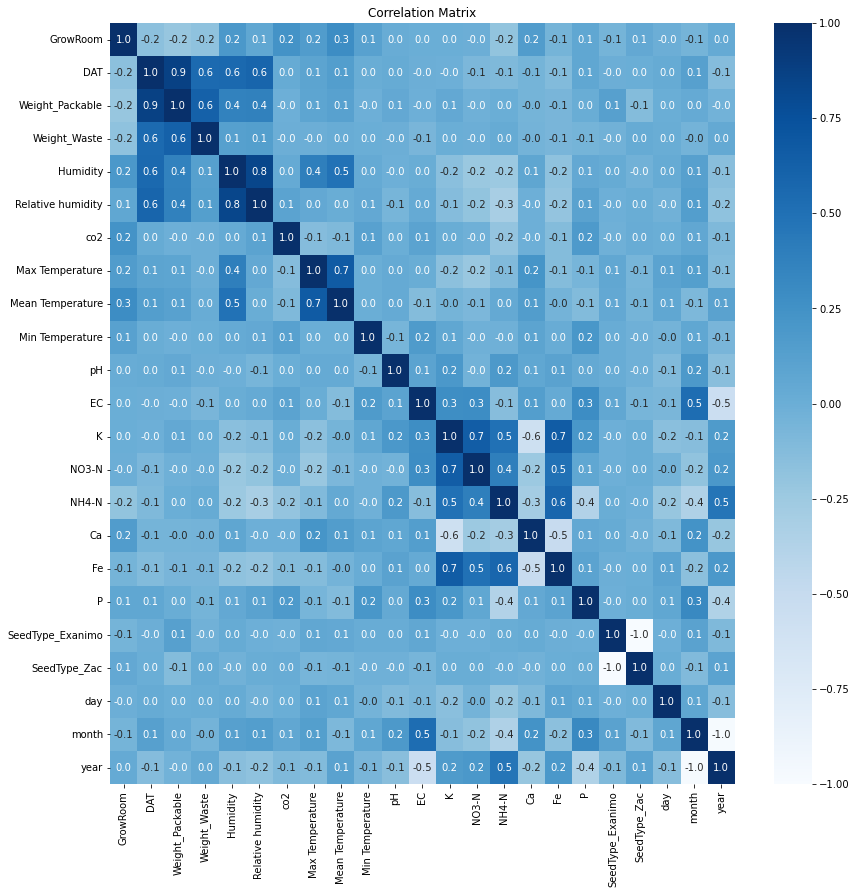

In [16]:
#plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = final_data.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, cmap="Blues", annot = True, fmt='.1f')
plt.title('Correlation Matrix')

In [42]:
final_data.dtypes

GrowRoom               int64
DAT                    int64
Weight_Packable      float64
Weight_Waste         float64
Humidity             float64
Relative humidity    float64
co2                  float64
Max Temperature      float64
Mean Temperature     float64
Min Temperature      float64
pH                   float64
EC                   float64
K                    float64
NO3-N                float64
NH4-N                float64
Ca                   float64
Fe                   float64
P                    float64
SeedType_Exanimo       int64
SeedType_Zac           int64
day                    int64
month                  int64
year                   int64
dtype: object

<AxesSubplot:xlabel='Weight_Packable'>

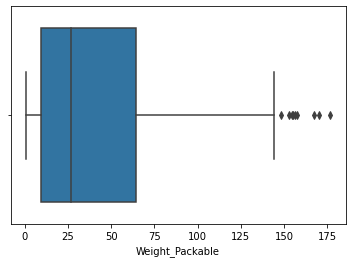

In [43]:
sns.boxplot(final_data['Weight_Packable'])

In [44]:
target_variable = final_data['Weight_Packable']

# Extract the feature columns
feature_columns = final_data.drop('Weight_Packable', axis=1)

# Calculate the correlation matrix
correlation_matrix = feature_columns.corrwith(target_variable)

# Sort the correlations in descending order
correlation_matrix = correlation_matrix.sort_values(ascending=False)

# Print the correlations
print(correlation_matrix)

DAT                  0.871743
Weight_Waste         0.622173
Relative humidity    0.381814
Humidity             0.369199
SeedType_Exanimo     0.123231
Mean Temperature     0.111021
Max Temperature      0.078494
K                    0.054208
pH                   0.053337
month                0.037243
P                    0.014503
day                  0.006918
NH4-N                0.002475
co2                 -0.010561
EC                  -0.013070
Min Temperature     -0.014232
NO3-N               -0.018539
year                -0.035253
Ca                  -0.049709
Fe                  -0.069920
SeedType_Zac        -0.123231
GrowRoom            -0.216018
dtype: float64


In [7]:
def adjusted_r2_score(y_test, y_pred, n_features):
    r2 = r2_score(y_test, y_pred)
    adjusted_r2 = 1 - (1 - r2) * ((len(y_test) - 1) / (len(y_test) - n_features - 1))
    return adjusted_r2

# Model Building

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, LSTM, RepeatVector  
from tensorflow.keras import layers
from tensorflow.keras import activations
import tensorflow as tf
from tensorflow import keras
import shap
import warnings
#warnings.DeprecationWarning
#warnings.warn("shap_values() is deprecated; use __call__().", warnings.DeprecationWarning)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_validate


# Scenario 1 - All features

In [10]:
xfeatures_1 = ['GrowRoom', 'DAT', 'Weight_Waste', 'Humidity',
       'Relative humidity', 'co2', 'Max Temperature', 'Mean Temperature',
       'Min Temperature', 'pH', 'EC', 'K', 'NO3-N', 'NH4-N', 'Ca', 'Fe', 'P',
       'SeedType_Exanimo', 'SeedType_Zac']
yfeatures = ['Weight_Packable']

In [11]:
X = final_data[xfeatures_1]
y = final_data['Weight_Packable'].values.reshape(-1,1)

In [12]:
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

# Fit the scaler on the training data and transform both training and test data
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

y_scaled = scaler.fit_transform(y)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.fit_transform(y_test)

num_features = X.shape[1]
print(num_features)
n_features = X.shape[1]

19


# DNN scenario 1 with K-fold

In [550]:
kf = KFold(n_splits=10)
adjusted_r2_scores_dnn1 = []
kfold_mae_scores_dnn1 = []
kfold_dnn_r2 = []
kfold_dnn_mse = []
kfold_dnn_rmse = []


for train_index, test_index in kf.split(X_scaled):
    X_train_scaled1, X_test_scaled1 = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_scaled[train_index], y_scaled[test_index]
    
    dnn_model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(num_features,)),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(8, activation='relu'),
        keras.layers.Dense(1, activation = None)])

    dnn_model.compile(loss='mean_squared_error', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.03))
    dnn1 = dnn_model.fit(X_train_scaled1, y_train, epochs=40, batch_size=100, verbose = 1, validation_data=(X_test_scaled1, y_test))
    dnn_model.evaluate(X_test_scaled1, y_test)
    y_pred = dnn_model.predict(X_test_scaled1)

    adjusted_r2 = adjusted_r2_score(y_test, y_pred, n_features)
    adjusted_r2_scores_dnn1.append(adjusted_r2)
    
    dnn_mae = mean_absolute_error(y_test, y_pred)
    kfold_mae_scores_dnn1.append(dnn_mae)
    
    dnn_r2 = r2_score(y_test, y_pred)
    kfold_dnn_r2.append(dnn_r2)
    
    dnn_mse = mean_squared_error(y_test, y_pred)
    kfold_dnn_mse.append(dnn_mse)
    
    dnn_rmse = np.sqrt(dnn_mse)
    kfold_dnn_rmse.append(dnn_rmse)

Epoch 1/40
7/7 [==============================] - 2s 52ms/step - loss: 0.9476 - val_loss: 0.0664
Epoch 2/40
7/7 [==============================] - 0s 13ms/step - loss: 0.0464 - val_loss: 0.0510
Epoch 3/40
7/7 [==============================] - 0s 12ms/step - loss: 0.0387 - val_loss: 0.0403
Epoch 4/40
7/7 [==============================] - 0s 13ms/step - loss: 0.0283 - val_loss: 0.0243
Epoch 5/40
7/7 [==============================] - 0s 13ms/step - loss: 0.0160 - val_loss: 0.0109
Epoch 6/40
7/7 [==============================] - 0s 12ms/step - loss: 0.0168 - val_loss: 0.0139
Epoch 7/40
7/7 [==============================] - 0s 13ms/step - loss: 0.0136 - val_loss: 0.0111
Epoch 8/40
7/7 [==============================] - 0s 14ms/step - loss: 0.0106 - val_loss: 0.0084
Epoch 9/40
7/7 [==============================] - 0s 15ms/step - loss: 0.0096 - val_loss: 0.0087
Epoch 10/40
7/7 [==============================] - 0s 14ms/step - loss: 0.0096 - val_loss: 0.0061
Epoch 11/40
7/7 [============

7/7 [==============================] - 0s 14ms/step - loss: 0.0396 - val_loss: 0.0690
Epoch 3/40
7/7 [==============================] - 0s 14ms/step - loss: 0.0374 - val_loss: 0.0636
Epoch 4/40
7/7 [==============================] - 0s 14ms/step - loss: 0.0333 - val_loss: 0.0565
Epoch 5/40
7/7 [==============================] - 0s 14ms/step - loss: 0.0270 - val_loss: 0.0358
Epoch 6/40
7/7 [==============================] - 0s 13ms/step - loss: 0.0169 - val_loss: 0.0150
Epoch 7/40
7/7 [==============================] - 0s 14ms/step - loss: 0.0117 - val_loss: 0.0152
Epoch 8/40
7/7 [==============================] - 0s 14ms/step - loss: 0.0121 - val_loss: 0.0120
Epoch 9/40
7/7 [==============================] - 0s 14ms/step - loss: 0.0109 - val_loss: 0.0200
Epoch 10/40
7/7 [==============================] - 0s 14ms/step - loss: 0.0076 - val_loss: 0.0203
Epoch 11/40
7/7 [==============================] - 0s 14ms/step - loss: 0.0082 - val_loss: 0.0083
Epoch 12/40
7/7 [======================

7/7 [==============================] - 0s 13ms/step - loss: 0.0494 - val_loss: 0.0469
Epoch 4/40
7/7 [==============================] - 0s 13ms/step - loss: 0.0428 - val_loss: 0.0749
Epoch 5/40
7/7 [==============================] - 0s 14ms/step - loss: 0.0377 - val_loss: 0.0355
Epoch 6/40
7/7 [==============================] - 0s 13ms/step - loss: 0.0310 - val_loss: 0.0401
Epoch 7/40
7/7 [==============================] - 0s 14ms/step - loss: 0.0239 - val_loss: 0.0263
Epoch 8/40
7/7 [==============================] - 0s 15ms/step - loss: 0.0140 - val_loss: 0.0155
Epoch 9/40
7/7 [==============================] - 0s 13ms/step - loss: 0.0123 - val_loss: 0.0211
Epoch 10/40
7/7 [==============================] - 0s 14ms/step - loss: 0.0142 - val_loss: 0.0152
Epoch 11/40
7/7 [==============================] - 0s 14ms/step - loss: 0.0109 - val_loss: 0.0112
Epoch 12/40
7/7 [==============================] - 0s 13ms/step - loss: 0.0094 - val_loss: 0.0105
Epoch 13/40
7/7 [=====================

7/7 [==============================] - 0s 15ms/step - loss: 0.0275 - val_loss: 0.0183
Epoch 5/40
7/7 [==============================] - 0s 15ms/step - loss: 0.0158 - val_loss: 0.0186
Epoch 6/40
7/7 [==============================] - 0s 15ms/step - loss: 0.0138 - val_loss: 0.0099
Epoch 7/40
7/7 [==============================] - 0s 14ms/step - loss: 0.0094 - val_loss: 0.0087
Epoch 8/40
7/7 [==============================] - 0s 15ms/step - loss: 0.0077 - val_loss: 0.0092
Epoch 9/40
7/7 [==============================] - 0s 16ms/step - loss: 0.0069 - val_loss: 0.0078
Epoch 10/40
7/7 [==============================] - 0s 16ms/step - loss: 0.0068 - val_loss: 0.0075
Epoch 11/40
7/7 [==============================] - 0s 17ms/step - loss: 0.0064 - val_loss: 0.0080
Epoch 12/40
7/7 [==============================] - 0s 17ms/step - loss: 0.0064 - val_loss: 0.0083
Epoch 13/40
7/7 [==============================] - 0s 16ms/step - loss: 0.0062 - val_loss: 0.0082
Epoch 14/40
7/7 [====================

7/7 [==============================] - 0s 13ms/step - loss: 0.0158 - val_loss: 0.0066
Epoch 6/40
7/7 [==============================] - 0s 13ms/step - loss: 0.0120 - val_loss: 0.0056
Epoch 7/40
7/7 [==============================] - 0s 14ms/step - loss: 0.0100 - val_loss: 0.0064
Epoch 8/40
7/7 [==============================] - 0s 13ms/step - loss: 0.0089 - val_loss: 0.0066
Epoch 9/40
7/7 [==============================] - 0s 13ms/step - loss: 0.0072 - val_loss: 0.0067
Epoch 10/40
7/7 [==============================] - 0s 14ms/step - loss: 0.0074 - val_loss: 0.0058
Epoch 11/40
7/7 [==============================] - 0s 14ms/step - loss: 0.0079 - val_loss: 0.0069
Epoch 12/40
7/7 [==============================] - 0s 14ms/step - loss: 0.0068 - val_loss: 0.0054
Epoch 13/40
7/7 [==============================] - 0s 14ms/step - loss: 0.0066 - val_loss: 0.0050
Epoch 14/40
7/7 [==============================] - 0s 14ms/step - loss: 0.0058 - val_loss: 0.0056
Epoch 15/40
7/7 [===================

In [551]:
# Print the evaluation metrics
print(dnn_model.summary())

print("Kfold Mean Squared Error (MSE):", np.mean(scaler.inverse_transform([kfold_dnn_rmse])))
print("Kfold Root Mean Squared Error (RMSE):", np.mean(scaler.inverse_transform([kfold_dnn_mse])))
print("Kfold Rsquared Score:", np.mean(kfold_dnn_r2))
print("Kfold adjusted Rsquared:",np.mean(adjusted_r2_scores_dnn1))
print("Kfold MAE score:",np.mean(scaler.inverse_transform([kfold_mae_scores_dnn1])))

Model: "sequential_139"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_556 (Dense)           (None, 64)                1280      
                                                                 
 dense_557 (Dense)           (None, 32)                2080      
                                                                 
 dense_558 (Dense)           (None, 8)                 264       
                                                                 
 dense_559 (Dense)           (None, 1)                 9         
                                                                 
Total params: 3,633
Trainable params: 3,633
Non-trainable params: 0
_________________________________________________________________
None
Kfold Mean Squared Error (MSE): 15.773843510935986
Kfold Root Mean Squared Error (RMSE): 2.6257386343361064
Kfold Rsquared Score: 0.7345929559985095
Kfold adjusted Rsquared: 0.6

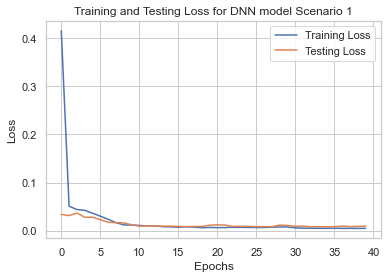

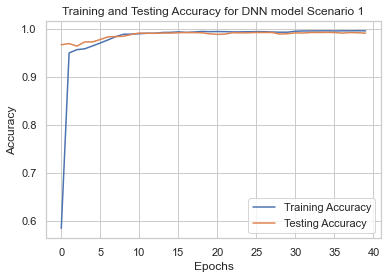

In [552]:
train_loss = dnn1.history['loss']
test_loss = dnn1.history['val_loss']

# Plot the training and testing loss
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss for DNN model Scenario 1')
plt.legend()
plt.show()

# Retrieve the training and testing accuracy from the history object
dnn1_train_accuracy = [1 - loss for loss in train_loss]
dnn1_test_accuracy = [1 - loss for loss in test_loss]

# Plot the training and testing accuracy
plt.plot(dnn1_train_accuracy, label='Training Accuracy')
plt.plot(dnn1_test_accuracy, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy for DNN model Scenario 1')
plt.legend()
plt.show()

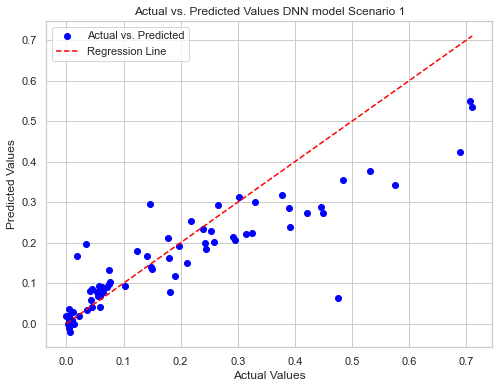

In [553]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Regression Line')
plt.title('Actual vs. Predicted Values DNN model Scenario 1')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [554]:
print("Training loss for 50 Epochs in grams: \n\n", scaler.inverse_transform([test_loss]))

Training loss for 50 Epochs in grams: 

 [[6.76170247 6.35718639 7.23249113 5.79106165 5.79024914 4.94404815
  4.03977087 3.93548818 3.8149197  3.20167379 2.71217836 2.7951665
  2.79164975 2.70592827 2.72838898 2.61116676 2.54620269 2.58081811
  2.6227749  2.99550202 3.17251467 3.07245311 2.59877148 2.65609498
  2.62997936 2.53543521 2.52714302 2.52461514 3.07607739 2.95482387
  2.65750929 2.70642828 2.5203756  2.53440054 2.49222979 2.52972195
  2.73876783 2.55343051 2.61783238 2.75546221]]


In [555]:
print("Accuracy score for 50 Epochs: \n\n", dnn1_test_accuracy)

Accuracy score for 50 Epochs: 

 [0.9664383605122566, 0.9688735418021679, 0.9636042192578316, 0.9722816050052643, 0.9722864963114262, 0.9773806147277355, 0.9828243516385555, 0.9834521319717169, 0.984177952632308, 0.9878696845844388, 0.9908164404332638, 0.990316852927208, 0.9903380237519741, 0.9908540658652782, 0.9907188527286053, 0.9914245288819075, 0.9918156117200851, 0.9916072273626924, 0.9913546480238438, 0.9891108358278871, 0.9880452221259475, 0.9886475913226604, 0.9914991483092308, 0.9911540616303682, 0.9913112772628665, 0.9918804317712784, 0.9919303506612778, 0.991945568472147, 0.9886257732287049, 0.9893557177856565, 0.9911455474793911, 0.9908510558307171, 0.9919710904359818, 0.9918866604566574, 0.9921405278146267, 0.9919148255139589, 0.9906563721597195, 0.9917721003293991, 0.9913844019174576, 0.9905558722093701]


In [556]:
dnn_results_1 = list([np.mean(scaler.inverse_transform([kfold_mae_scores_dnn1])), np.mean(scaler.inverse_transform([kfold_dnn_mse])), np.mean(scaler.inverse_transform([kfold_dnn_rmse])), np.mean(kfold_dnn_r2), np.mean(adjusted_r2_scores_dnn1)])
dnn_results_1

[11.880940827012868,
 2.6257386343361064,
 15.773843510935986,
 0.7345929559985095,
 0.6353812358887622]

# SVR scenario 1

In [39]:
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

# Fit the scaler on the training data and transform both training and test data
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [449]:
svr_model = SVR(kernel = 'linear')
svr1 = svr_model.fit(X_train_scaled, y_train)
y_pred = svr_model.predict(X_test_scaled)

svr_mse = mean_squared_error(y_test, y_pred)
svr_rmse = np.sqrt(svr_mse)
svr_mae = mean_absolute_error(y_test, y_pred)
svr_r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", svr_mse)
print("Root Mean Squared Error:", svr_rmse)
print("Mean Absolute Error:", svr_mae)
print("R^2 Score:", svr_r2)

Mean Squared Error: 528.3448837201274
Root Mean Squared Error: 22.98575392977414
Mean Absolute Error: 16.374019337882366
R^2 Score: 0.6581813093410549


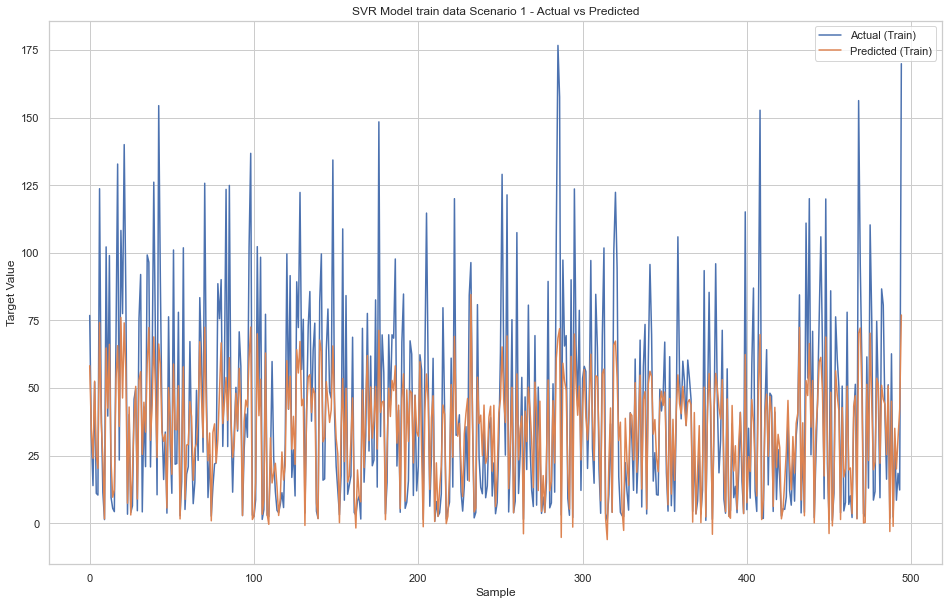

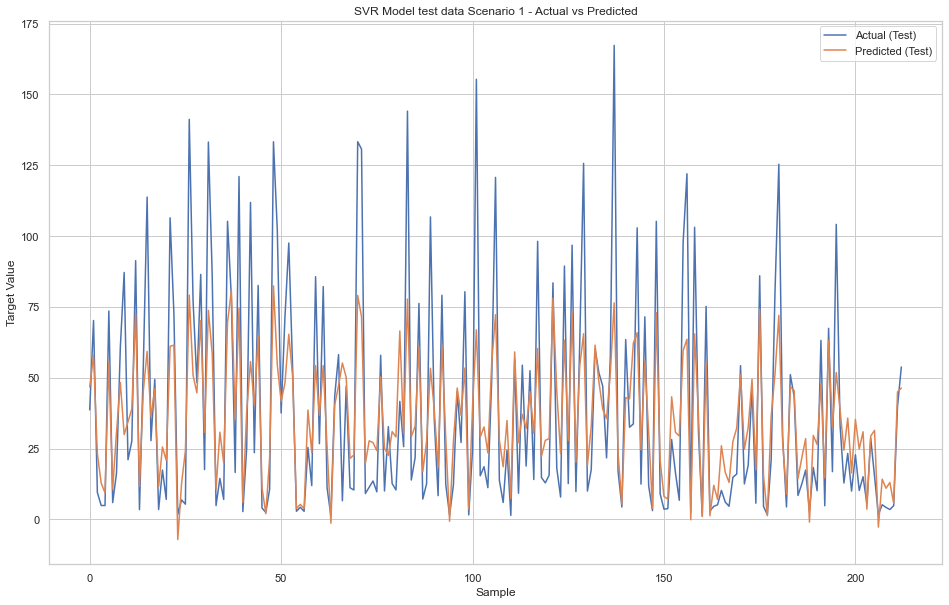

In [450]:
y_train_pred = svr_model.predict(X_train_scaled)
y_test_pred = svr_model.predict(X_test_scaled)

# Calculate the mean squared error (loss) for training and testing
train_loss = mean_absolute_error(y_train, y_train_pred)
test_loss = mean_absolute_error(y_test, y_test_pred)

# Calculate the accuracy as 1 - loss
train_accuracy = 1 - train_loss
test_accuracy = 1 - test_loss

# Plot the training and testing accuracy
plt.figure(figsize=(16, 10))
plt.plot(y_train, label='Actual (Train)')
plt.plot(y_train_pred, label='Predicted (Train)')
plt.xlabel('Sample')
plt.ylabel('Target Value')
plt.title('SVR Model train data Scenario 1 - Actual vs Predicted')
plt.legend()
plt.show()


plt.figure(figsize=(16, 10))
plt.plot(y_test, label='Actual (Test)')
plt.plot(y_test_pred, label='Predicted (Test)')
plt.xlabel('Sample')
plt.ylabel('Target Value')
plt.title('SVR Model test data Scenario 1 - Actual vs Predicted')
plt.legend()
plt.show()


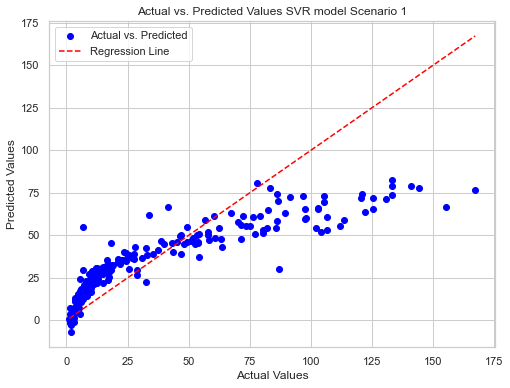

In [451]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Regression Line')
plt.title('Actual vs. Predicted Values SVR model Scenario 1')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [452]:
n_features = X.shape[1]  # Number of features in the model

# Calculate the adjusted R2 score
svr_adj_r2 = adjusted_r2_score(y_test, y_pred, n_features)
print("Adjusted R2 Score:", svr_adj_r2)

Adjusted R2 Score: 0.6245307646647857


In [453]:
scores = cross_val_score(svr_model, X_scaled, y, cv=10, scoring='r2')

n = len(y)
p = X.shape[1]  # Number of predictors
adj_r2_scores = 1 - (1 - scores) * (n - 1) / (n - p - 1)

# Print the adjusted R2 scores for each fold
print("Adjusted R2 Scores:", adj_r2_scores)

svr_mse_scores = -cross_val_score(rf_model, X_scaled, y, cv=10, scoring='neg_mean_squared_error')
svr_mse = np.mean(svr_mse_scores)

svr_rmse = np.mean(np.sqrt(svr_mse_scores))

# Calculate and print the mean adjusted R2 score
mean_svr_adj_r2_1 = np.mean(adj_r2_scores)
print("Mean Adjusted R2:", mean_svr_adj_r2_1)

Adjusted R2 Scores: [0.61999308 0.66699956 0.50873742 0.59634155 0.61921709 0.60009244
 0.5778485  0.69893962 0.67896462 0.55880367]
Mean Adjusted R2: 0.612593755946435


In [454]:
scores = cross_val_score(svr_model, X_scaled, y, cv=10, scoring='neg_mean_absolute_error')

# Convert scores to positive values and calculate RMSE
mae_scores = -scores

# Print the RMSE scores
print("Cross-validated MAE scores:", mae_scores)

# Calculate the mean RMSE
mean_svr_mae_1 = np.mean(mae_scores)
print("Mean MAE:", mean_svr_mae_1)

Cross-validated MAE scores: [16.84202679 15.92032492 21.6056109  16.7815809  19.04491712 14.58625305
 15.61054066 10.59797303 10.67091763 14.72088311]
Mean MAE: 15.638102812815594


In [455]:
svr_results_1 = list([mean_svr_mae_1, svr_rmse, svr_mse, svr_r2, mean_svr_adj_r2_1])
svr_results_1

[15.638102812815594,
 12.478556334276542,
 158.628501288653,
 0.6581813093410549,
 0.612593755946435]

# Random Forest Regressor  scenario 1

In [40]:
# Create a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=44, max_depth = 11)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances)


# Evaluate the model
rfr_mse = mean_squared_error(y_test, y_pred)
rfr_rmse = np.sqrt(rfr_mse)
rfr_mae = mean_absolute_error(y_test, y_pred)
rfr_r2 = r2_score(y_test, y_pred)

print("\nMean Squared Error:", rfr_mse)
print("Root Mean Squared Error:", rfr_rmse)
print("Mean Absolute Error:", rfr_mae)
print("R^2 Score:", rfr_r2)

              Feature  Importance
1                 DAT    0.823697
2        Weight_Waste    0.052037
13              NH4-N    0.029436
8     Min Temperature    0.014106
17   SeedType_Exanimo    0.010108
16                  P    0.007282
3            Humidity    0.007097
14                 Ca    0.006435
18       SeedType_Zac    0.006390
0            GrowRoom    0.006354
11                  K    0.005945
4   Relative humidity    0.005224
7    Mean Temperature    0.005033
10                 EC    0.004030
5                 co2    0.003920
6     Max Temperature    0.003790
12              NO3-N    0.003246
15                 Fe    0.003138
9                  pH    0.002731

Mean Squared Error: 182.73759195948898
Root Mean Squared Error: 13.518046898849292
Mean Absolute Error: 8.088574855445255
R^2 Score: 0.8817758506944324


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


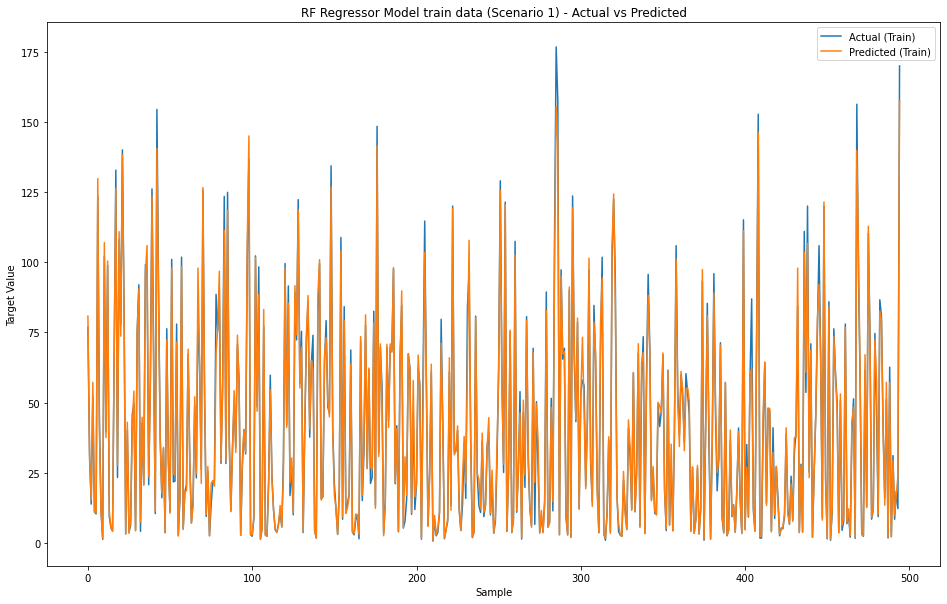

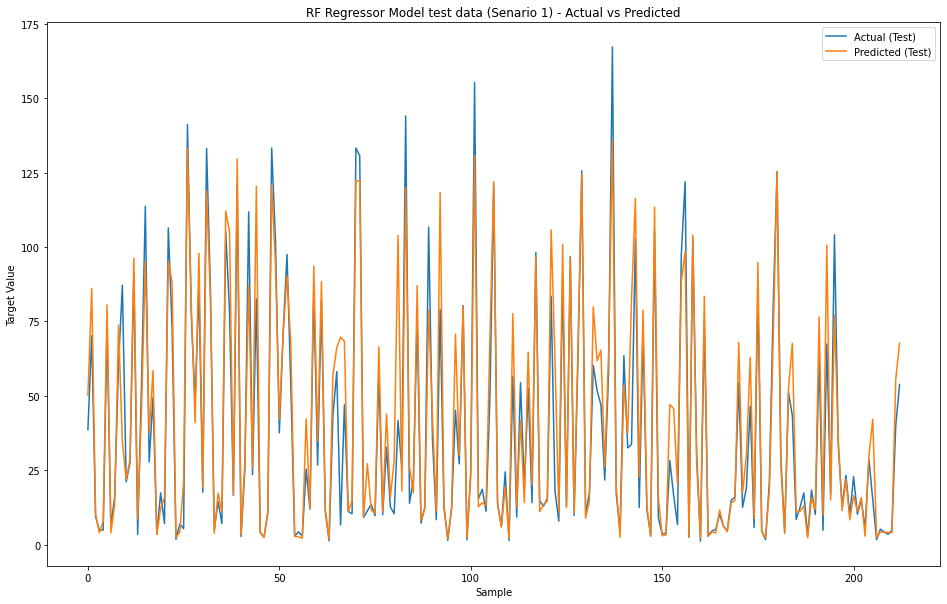

In [41]:
y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

# Calculate the mean squared error (loss) for training and testing
train_loss = mean_absolute_error(y_train, y_train_pred)
test_loss = mean_absolute_error(y_test, y_test_pred)

# Calculate the accuracy as 1 - loss
train_accuracy = 1 - train_loss
test_accuracy = 1 - test_loss

# Plot the training and testing accuracy
plt.figure(figsize=(16, 10))
plt.plot(y_train, label='Actual (Train)')
plt.plot(y_train_pred, label='Predicted (Train)')
plt.xlabel('Sample')
plt.ylabel('Target Value')
plt.title('RF Regressor Model train data (Scenario 1) - Actual vs Predicted')
plt.legend()
plt.show()


plt.figure(figsize=(16, 10))
plt.plot(y_test, label='Actual (Test)')
plt.plot(y_test_pred, label='Predicted (Test)')
plt.xlabel('Sample')
plt.ylabel('Target Value')
plt.title('RF Regressor Model test data (Senario 1) - Actual vs Predicted')
plt.legend()
plt.show()


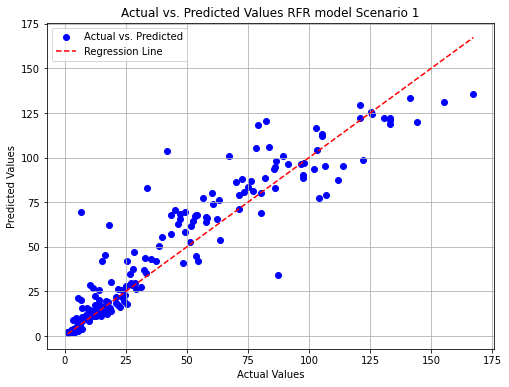

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Regression Line')
plt.title('Actual vs. Predicted Values RFR model Scenario 1')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
rf_model.feature_importances_

array([0.00635435, 0.82369711, 0.05203722, 0.0070968 , 0.00522423,
       0.00392003, 0.00379003, 0.00503262, 0.01410614, 0.00273113,
       0.00402965, 0.00594472, 0.00324584, 0.02943578, 0.00643515,
       0.0031384 , 0.00728211, 0.01010824, 0.00639046])

In [44]:
# Assuming you have your true target values 'y_true' and predicted values 'y_pred'

n_features = X.shape[1]  # Number of features in the model

# Calculate the adjusted R2 score
rfr_adj_r2 = adjusted_r2_score(y_test, y_pred, n_features)
print("Adjusted R2 Score:", rfr_adj_r2)

Adjusted R2 Score: 0.8701372038716045


In [45]:
scores = cross_val_score(rf_model, X_scaled, y, cv=10, scoring='r2')

n = len(y)
p = X.shape[1]  # Number of predictors
adj_r2_scores = 1 - (1 - scores) * (n - 1) / (n - p - 1)

# Print the adjusted R2 scores for each fold
print("Adjusted R2 Scores:", adj_r2_scores)

rfr_mse_scores = -cross_val_score(rf_model, X_scaled, y, cv=10, scoring='neg_mean_squared_error')
rfr_mse = np.mean(rfr_mse_scores)

rfr_rmse = np.mean(np.sqrt(rfr_mse_scores))

# Calculate and print the mean adjusted R2 score
mean_rf_adj_r2_1 = np.mean(adj_r2_scores)
print("Mean Adjusted R2:", mean_rf_adj_r2_1)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

Adjusted R2 Scores: [0.94908543 0.94431225 0.91730767 0.86809825 0.91315167 0.83375891
 0.82225055 0.72748618 0.89639248 0.80885158]


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

Mean Adjusted R2: 0.8680694952793848


In [46]:
scores = cross_val_score(rf_model, X_scaled, y, cv=10, scoring='neg_mean_absolute_error')

# Convert scores to positive values and calculate RMSE
mae_scores = -scores

# Print the RMSE scores
print("Cross-validated MAE scores:", mae_scores)

# Calculate the mean RMSE
mean_rf_mae_1 = np.mean(mae_scores)
print("Mean MAE:", mean_rf_mae_1)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

Cross-validated MAE scores: [7.11281548 6.23325122 8.46701108 8.30534031 6.48764399 7.38162906
 9.08883901 6.95526548 4.90591825 9.1414122 ]
Mean MAE: 7.407912607406631


In [47]:
rfr_results_1 = list([mean_rf_mae_1, rfr_rmse, rfr_mse, rfr_r2, mean_rf_adj_r2_1])
rfr_results_1

[7.407912607406631,
 12.150133577319918,
 150.41838870247707,
 0.8817758506944324,
 0.8680694952793848]

# SHAP feature selection for Random Forest

In [48]:
explainer = shap.Explainer(rf_model)
shap_values = explainer.shap_values(X)

feature_importances = np.abs(shap_values).mean(axis=0)
feature_importances /= feature_importances.sum()

feature_names = final_data.columns

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_names = feature_names[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Print the sorted feature importances
print("SHAP values for features")
for feature_name, importance in zip(sorted_feature_names, sorted_importances):
    print(f"{feature_name}: {importance:.4f}")

SHAP values for features
DAT: 0.7391
Weight_Packable: 0.0603
P: 0.0454
NO3-N: 0.0351
SeedType_Exanimo: 0.0248
co2: 0.0157
NH4-N: 0.0146
GrowRoom: 0.0133
Fe: 0.0121
Weight_Waste: 0.0088
EC: 0.0088
Humidity: 0.0079
Mean Temperature: 0.0051
Relative humidity: 0.0028
Min Temperature: 0.0021
Max Temperature: 0.0020
Ca: 0.0011
pH: 0.0009
K: 0.0003


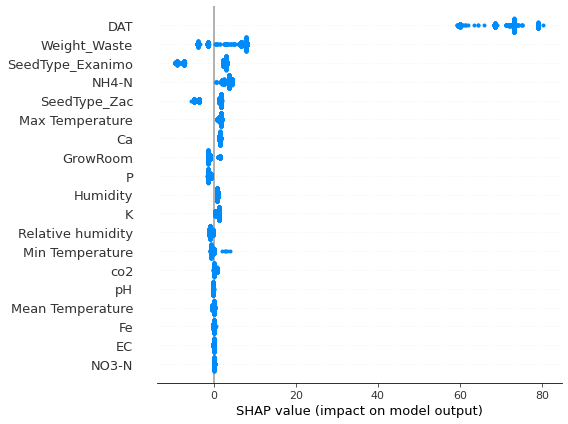

In [51]:
#instance_to_explain = X_test.iloc[0]

#shap.summary_plot(shap_values, instance_to_explain, feature_names=X_train.columns)

shap.summary_plot(shap_values, feature_names=X.columns, plot_size=(8, 6))

# XGBoost - checking the feasibility of XGB

In [465]:
import xgboost as xgb
params = {
    'objective': 'reg:squarederror',  # Loss function for regression
    'eval_metric': 'rmse'  # Evaluation metric
}

# Convert the training data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)

# Train the XGBoost model
num_rounds = 100  # Number of boosting rounds
xgb_model = xgb.train(params, dtrain, num_rounds)

# Predict on the test set
dtest = xgb.DMatrix(X_test_scaled)
y_pred = xgb_model.predict(dtest)

# Evaluate the model
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", xgb_mse)
print("Root Mean Squared Error:", xgb_rmse)
print("Mean Absolute Error:", xgb_mae)
print("R^2 Score:", xgb_r2)

Mean Squared Error: 200.6082371866941
Root Mean Squared Error: 14.163623730765165
Mean Absolute Error: 8.356794774758614
R^2 Score: 0.8702142348994935


# Scenario 2 - correlated and selected features

In [466]:
xfeatures_2 = ['GrowRoom', 'DAT', 'Weight_Waste','Relative humidity','Mean Temperature', 'NH4-N', 'NO3-N']
yfeatures = ['Weight_Packable']

In [467]:
X = final_data[xfeatures_2]
y = final_data['Weight_Packable'].values.reshape(-1,1)

In [468]:
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

# Fit the scaler on the training data and transform both training and test data
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

y_scaled = scaler.fit_transform(y)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.fit_transform(y_test)

num_features = X.shape[1]
print(num_features)
n_features = X.shape[1]

7


# DNN scenario 2 with K fold

In [469]:
kf = KFold(n_splits=10)
adjusted_r2_scores_dnn1 = []
kfold_mae_scores_dnn1 = []
kfold_dnn_r2 = []
kfold_dnn_mse = []
kfold_dnn_rmse = []


for train_index, test_index in kf.split(X_scaled):
    X_train_scaled1, X_test_scaled1 = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_scaled[train_index], y_scaled[test_index]
    
    dnn_model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(num_features,)),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(8, activation='relu'),
        keras.layers.Dense(1, activation = None)])

    dnn_model.compile(loss='mean_squared_error', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.03))
    dnn1 = dnn_model.fit(X_train_scaled1, y_train, epochs=50, batch_size=100, verbose = 1, validation_data=(X_test_scaled1, y_test))
    dnn_model.evaluate(X_test_scaled1, y_test)
    y_pred = dnn_model.predict(X_test_scaled1)

    adjusted_r2 = adjusted_r2_score(y_test, y_pred, n_features)
    adjusted_r2_scores_dnn1.append(adjusted_r2)
    
    dnn_mae = mean_absolute_error(y_test, y_pred)
    kfold_mae_scores_dnn1.append(dnn_mae)
    
    dnn_r2 = r2_score(y_test, y_pred)
    kfold_dnn_r2.append(dnn_r2)
    
    dnn_mse = mean_squared_error(y_test, y_pred)
    kfold_dnn_mse.append(dnn_mse)
    
    dnn_rmse = np.sqrt(dnn_mse)
    kfold_dnn_rmse.append(dnn_rmse)

Epoch 1/50
7/7 [==============================] - 3s 55ms/step - loss: 0.0578 - val_loss: 0.0297
Epoch 2/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0153 - val_loss: 0.0074
Epoch 3/50
7/7 [==============================] - 0s 13ms/step - loss: 0.0105 - val_loss: 0.0099
Epoch 4/50
7/7 [==============================] - 0s 13ms/step - loss: 0.0104 - val_loss: 0.0078
Epoch 5/50
7/7 [==============================] - 0s 13ms/step - loss: 0.0091 - val_loss: 0.0153
Epoch 6/50
7/7 [==============================] - 0s 14ms/step - loss: 0.0115 - val_loss: 0.0102
Epoch 7/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0113 - val_loss: 0.0068
Epoch 8/50
7/7 [==============================] - 0s 13ms/step - loss: 0.0084 - val_loss: 0.0067
Epoch 9/50
7/7 [==============================] - 0s 13ms/step - loss: 0.0077 - val_loss: 0.0059
Epoch 10/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0076 - val_loss: 0.0066
Epoch 11/50
7/7 [============

7/7 [==============================] - 0s 12ms/step - loss: 0.0462 - val_loss: 0.0524
Epoch 34/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0461 - val_loss: 0.0532
Epoch 35/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0462 - val_loss: 0.0531
Epoch 36/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0461 - val_loss: 0.0527
Epoch 37/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0462 - val_loss: 0.0522
Epoch 38/50
7/7 [==============================] - 0s 10ms/step - loss: 0.0462 - val_loss: 0.0519
Epoch 39/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0461 - val_loss: 0.0528
Epoch 40/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0462 - val_loss: 0.0534
Epoch 41/50
7/7 [==============================] - 0s 10ms/step - loss: 0.0462 - val_loss: 0.0527
Epoch 42/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0462 - val_loss: 0.0519
Epoch 43/50
7/7 [===============

7/7 [==============================] - 0s 12ms/step - loss: 0.0074 - val_loss: 0.0081
Epoch 15/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0085 - val_loss: 0.0108
Epoch 16/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0093 - val_loss: 0.0089
Epoch 17/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0087 - val_loss: 0.0095
Epoch 18/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0086 - val_loss: 0.0061
Epoch 19/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0064 - val_loss: 0.0061
Epoch 20/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0064 - val_loss: 0.0061
Epoch 21/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0062 - val_loss: 0.0069
Epoch 22/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0060 - val_loss: 0.0061
Epoch 23/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0062 - val_loss: 0.0060
Epoch 24/50
7/7 [===============

7/7 [==============================] - 0s 12ms/step - loss: 0.0059 - val_loss: 0.0081
Epoch 47/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0056 - val_loss: 0.0094
Epoch 48/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0062 - val_loss: 0.0095
Epoch 49/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0061 - val_loss: 0.0089
Epoch 50/50
3/3 [==============================] - 0s 4ms/step
Epoch 1/50
7/7 [==============================] - 3s 56ms/step - loss: 0.1994 - val_loss: 0.0357
Epoch 2/50
7/7 [==============================] - 0s 10ms/step - loss: 0.0518 - val_loss: 0.0377
Epoch 3/50
7/7 [==============================] - 0s 10ms/step - loss: 0.0399 - val_loss: 0.0285
Epoch 4/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0262 - val_loss: 0.0154
Epoch 5/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0144 - val_loss: 0.0135
Epoch 6/50
7/7 [==============================] - 0s 12ms/step - loss: 0

7/7 [==============================] - 0s 13ms/step - loss: 0.0064 - val_loss: 0.0085
Epoch 28/50
7/7 [==============================] - 0s 17ms/step - loss: 0.0068 - val_loss: 0.0086
Epoch 29/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0071 - val_loss: 0.0087
Epoch 30/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0061 - val_loss: 0.0090
Epoch 31/50
7/7 [==============================] - 0s 10ms/step - loss: 0.0058 - val_loss: 0.0085
Epoch 32/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0059 - val_loss: 0.0084
Epoch 33/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0056 - val_loss: 0.0083
Epoch 34/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0057 - val_loss: 0.0082
Epoch 35/50
7/7 [==============================] - 0s 13ms/step - loss: 0.0055 - val_loss: 0.0085
Epoch 36/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0055 - val_loss: 0.0081
Epoch 37/50
7/7 [===============

7/7 [==============================] - 0s 13ms/step - loss: 0.0084 - val_loss: 0.0109
Epoch 9/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0104 - val_loss: 0.0079
Epoch 10/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0088 - val_loss: 0.0044
Epoch 11/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0084 - val_loss: 0.0055
Epoch 12/50
7/7 [==============================] - 0s 13ms/step - loss: 0.0079 - val_loss: 0.0045
Epoch 13/50
7/7 [==============================] - 0s 13ms/step - loss: 0.0069 - val_loss: 0.0046
Epoch 14/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0070 - val_loss: 0.0046
Epoch 15/50
7/7 [==============================] - 0s 14ms/step - loss: 0.0071 - val_loss: 0.0054
Epoch 16/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0073 - val_loss: 0.0049
Epoch 17/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0069 - val_loss: 0.0043
Epoch 18/50
7/7 [================

7/7 [==============================] - 0s 13ms/step - loss: 0.0061 - val_loss: 0.0078
Epoch 41/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0058 - val_loss: 0.0076
Epoch 42/50
7/7 [==============================] - 0s 13ms/step - loss: 0.0063 - val_loss: 0.0073
Epoch 43/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0060 - val_loss: 0.0075
Epoch 44/50
7/7 [==============================] - 0s 13ms/step - loss: 0.0061 - val_loss: 0.0084
Epoch 45/50
7/7 [==============================] - 0s 13ms/step - loss: 0.0066 - val_loss: 0.0077
Epoch 46/50
7/7 [==============================] - 0s 10ms/step - loss: 0.0057 - val_loss: 0.0068
Epoch 47/50
7/7 [==============================] - 0s 10ms/step - loss: 0.0059 - val_loss: 0.0079
Epoch 48/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0063 - val_loss: 0.0090
Epoch 49/50
7/7 [==============================] - 0s 10ms/step - loss: 0.0066 - val_loss: 0.0084
Epoch 50/50
3/3 [===============

In [470]:
# Print the evaluation metrics
print(dnn_model.summary())

print("Kfold Mean Squared Error (MSE):", np.mean(scaler.inverse_transform([kfold_dnn_rmse])))
print("Kfold Root Mean Squared Error (RMSE):", np.mean(scaler.inverse_transform([kfold_dnn_mse])))
print("Kfold Rsquared Score:", np.mean(kfold_dnn_r2))
print("Kfold adjusted Rsquared:",np.mean(adjusted_r2_scores_dnn1))
print("Kfold MAE score:",np.mean(scaler.inverse_transform([kfold_mae_scores_dnn1])))

Model: "sequential_119"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_476 (Dense)           (None, 64)                512       
                                                                 
 dense_477 (Dense)           (None, 32)                2080      
                                                                 
 dense_478 (Dense)           (None, 8)                 264       
                                                                 
 dense_479 (Dense)           (None, 1)                 9         
                                                                 
Total params: 2,865
Trainable params: 2,865
Non-trainable params: 0
_________________________________________________________________
None
Kfold Mean Squared Error (MSE): 17.45972587568536
Kfold Root Mean Squared Error (RMSE): 3.115604851425895
Kfold Rsquared Score: 0.7322652248980873
Kfold adjusted Rsquared: 0.702

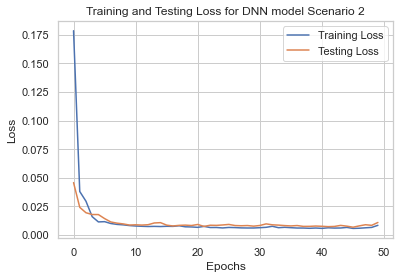

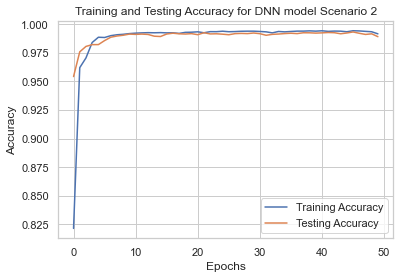

In [494]:
train_loss = dnn1.history['loss']
test_loss = dnn1.history['val_loss']

# Plot the training and testing loss
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss for DNN model Scenario 2')
plt.legend()
plt.show()

# Retrieve the training and testing accuracy from the history object
dnn1_train_accuracy = [1 - loss for loss in train_loss]
dnn1_test_accuracy = [1 - loss for loss in test_loss]

# Plot the training and testing accuracy
plt.plot(dnn1_train_accuracy, label='Training Accuracy')
plt.plot(dnn1_test_accuracy, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy for DNN model Scenario 2')
plt.legend()
plt.show()

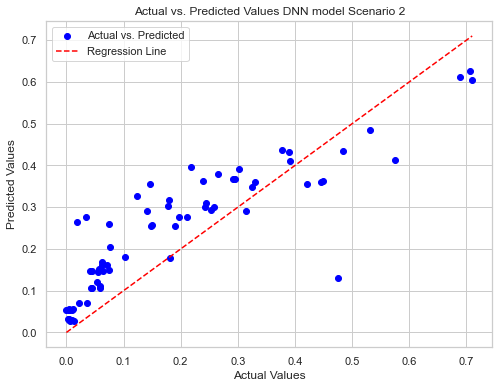

In [472]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Regression Line')
plt.title('Actual vs. Predicted Values DNN model Scenario 2')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [473]:
print("Training loss for 50 Epochs in grams: \n\n", scaler.inverse_transform([test_loss]))

Training loss for 50 Epochs in grams: 

 [[8.79087332 5.19940346 4.41546508 4.15588199 4.15070185 3.56713426
  3.07715537 2.90225213 2.793621   2.62708421 2.66742944 2.6246442
  2.6780238  2.9309176  2.97643988 2.613386   2.49589367 2.5823435
  2.61719979 2.56173121 2.71200927 2.43023938 2.60147944 2.58124401
  2.6396919  2.71893    2.55816464 2.5254425  2.55473158 2.46841062
  2.56568625 2.79716823 2.66357156 2.61733269 2.54727294 2.50181996
  2.55403339 2.43304759 2.43948262 2.48312563 2.44768571 2.39740044
  2.42697356 2.57765176 2.46725103 2.31641611 2.50696468 2.67444083
  2.58653864 3.00249918]]


In [474]:
print("Accuracy score for 50 Epochs: \n\n", dnn1_test_accuracy)

Accuracy score for 50 Epochs: 

 [0.9542227797210217, 0.9758433792740107, 0.9805626776069403, 0.9821253642439842, 0.9821565486490726, 0.9856696175411344, 0.988619283773005, 0.9896721988916397, 0.9903261568397284, 0.9913287060335279, 0.991085828281939, 0.9913433948531747, 0.9910220503807068, 0.9894996332004666, 0.9892255896702409, 0.9914111690595746, 0.9921184713020921, 0.9915980445221066, 0.9913882100954652, 0.9917221302166581, 0.9908174583688378, 0.9925137092359364, 0.9914828464388847, 0.9916046634316444, 0.9912528079003096, 0.9907757956534624, 0.9917436009272933, 0.9919405877590179, 0.9917642679065466, 0.9922839188948274, 0.9916983209550381, 0.990304802544415, 0.9911090526729822, 0.9913874100893736, 0.991809168830514, 0.9920827951282263, 0.9917684709653258, 0.992496803868562, 0.9924580650404096, 0.992195334751159, 0.9924086825922132, 0.9927113992162049, 0.9925333694554865, 0.991626288741827, 0.9922908996231854, 0.993198923766613, 0.9920518239960074, 0.9910436198115349, 0.991572789847

In [475]:
dnn_results_2 = list([np.mean(scaler.inverse_transform([kfold_mae_scores_dnn1])), np.mean(scaler.inverse_transform([kfold_dnn_mse])), np.mean(scaler.inverse_transform([kfold_dnn_rmse])), np.mean(kfold_dnn_r2), np.mean(adjusted_r2_scores_dnn1)])
dnn_results_2

[12.447675601028845,
 3.115604851425895,
 17.45972587568536,
 0.7322652248980873,
 0.7024387491195768]

# SVR scenario 2

In [476]:
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

# Fit the scaler on the training data and transform both training and test data
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [477]:
svr_model = SVR(kernel = 'linear')
svr_model.fit(X_train_scaled, y_train)
y_pred = svr_model.predict(X_test_scaled)

svr_mse = mean_squared_error(y_test, y_pred)
svr_rmse = np.sqrt(svr_mse)
svr_mae = mean_absolute_error(y_test, y_pred)
svr_r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", svr_mse)
print("Root Mean Squared Error:", svr_rmse)
print("Mean Absolute Error:", svr_mae)
print("R^2 Score:", svr_r2)

Mean Squared Error: 535.5922424970493
Root Mean Squared Error: 23.142865909326122
Mean Absolute Error: 16.059012366070185
R^2 Score: 0.6534925487148133


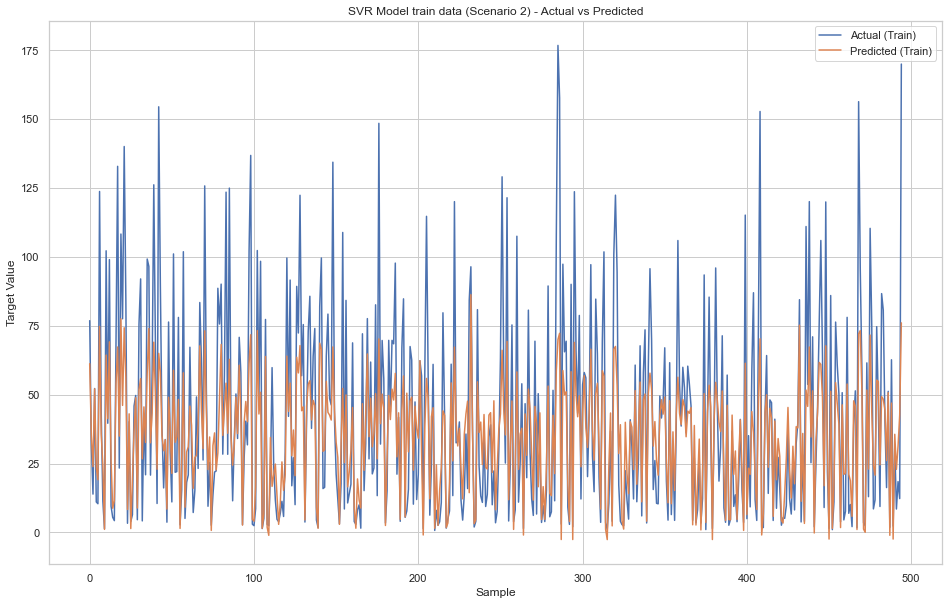

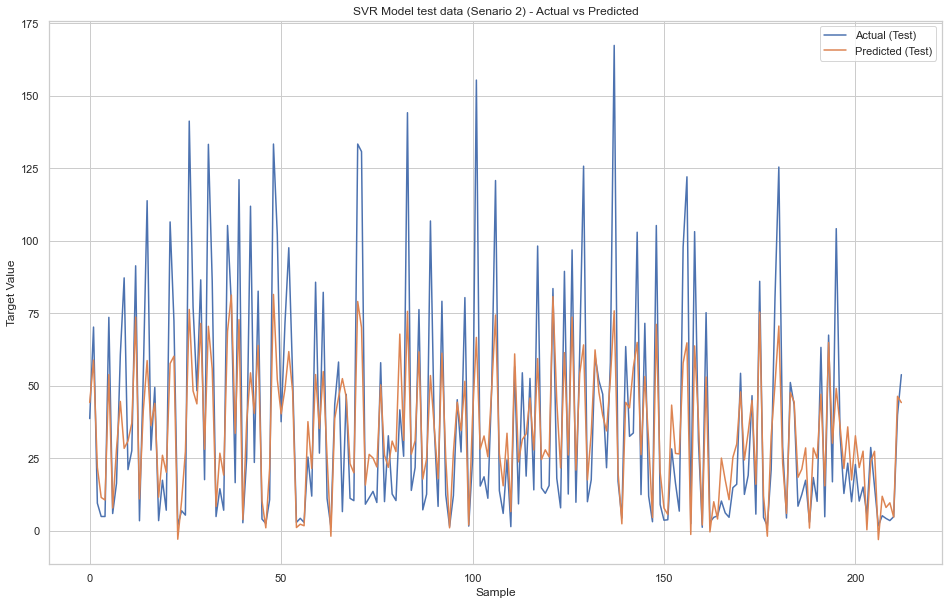

In [478]:
y_train_pred = svr_model.predict(X_train_scaled)
y_test_pred = svr_model.predict(X_test_scaled)

# Calculate the mean squared error (loss) for training and testing
train_loss = mean_absolute_error(y_train, y_train_pred)
test_loss = mean_absolute_error(y_test, y_test_pred)

# Calculate the accuracy as 1 - loss
train_accuracy = 1 - train_loss
test_accuracy = 1 - test_loss

# Plot the training and testing accuracy
plt.figure(figsize=(16, 10))
plt.plot(y_train, label='Actual (Train)')
plt.plot(y_train_pred, label='Predicted (Train)')
plt.xlabel('Sample')
plt.ylabel('Target Value')
plt.title('SVR Model train data (Scenario 2) - Actual vs Predicted')
plt.legend()
plt.show()


plt.figure(figsize=(16, 10))
plt.plot(y_test, label='Actual (Test)')
plt.plot(y_test_pred, label='Predicted (Test)')
plt.xlabel('Sample')
plt.ylabel('Target Value')
plt.title('SVR Model test data (Senario 2) - Actual vs Predicted')
plt.legend()
plt.show()


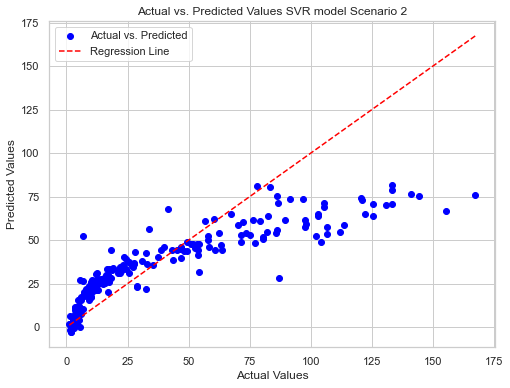

In [479]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Regression Line')
plt.title('Actual vs. Predicted Values SVR model Scenario 2')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [480]:
n_features = X.shape[1]  # Number of features in the model

# Calculate the adjusted R2 score
svr_adj_r2 = adjusted_r2_score(y_test, y_pred, n_features)
print("Adjusted R2 Score:", svr_adj_r2)

Adjusted R2 Score: 0.6416605869636118


In [481]:
scores = cross_val_score(svr_model, X_scaled, y, cv=10, scoring='r2')

n = len(y)
p = X.shape[1]  # Number of predictors
adj_r2_scores = 1 - (1 - scores) * (n - 1) / (n - p - 1)

# Print the adjusted R2 scores for each fold
print("Adjusted R2 Scores:", adj_r2_scores)

# Calculate and print the mean adjusted R2 score
mean_svr_adj_r2_2 = np.mean(adj_r2_scores)
print("Mean Adjusted R2:", mean_svr_adj_r2_2)

Adjusted R2 Scores: [0.62162475 0.65815043 0.5186937  0.59722152 0.62366334 0.60345352
 0.56129352 0.70429678 0.66855897 0.56795099]
Mean Adjusted R2: 0.612490754006332


In [482]:
scores = cross_val_score(svr_model, X_scaled, y, cv=10, scoring='neg_mean_absolute_error')

# Convert scores to positive values and calculate RMSE
mae_scores = -scores

# Print the RMSE scores
print("Cross-validated MAE scores:", mae_scores)

svr_mse_scores = -cross_val_score(rf_model, X_scaled, y, cv=10, scoring='neg_mean_squared_error')
svr_mse2 = np.mean(svr_mse_scores)

svr_rmse2 = np.mean(np.sqrt(svr_mse_scores))

# Calculate the mean RMSE
mean_svr_mae_2 = np.mean(mae_scores)
print("Mean MAE:", mean_svr_mae_2)

Cross-validated MAE scores: [16.92361841 15.92709719 21.1987662  16.76873852 18.73390671 14.67404062
 16.03304167 10.3970157  10.90066907 14.6710751 ]
Mean MAE: 15.622796919577263


In [483]:
svr_results_2 = list([mean_svr_mae_2, svr_rmse2, svr_mse2, svr_r2, mean_svr_adj_r2_2])
svr_results_2

[15.622796919577263,
 14.264138679466896,
 205.98890545733576,
 0.6534925487148133,
 0.612490754006332]

# Random Forest Regressor  scenario 2

In [484]:
# Create a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=44, max_depth = 11)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
rfr_mse = mean_squared_error(y_test, y_pred)
rfr_rmse = np.sqrt(rfr_mse)
rfr_mae = mean_absolute_error(y_test, y_pred)
rfr_r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", rfr_mse)
print("Root Mean Squared Error:", rfr_rmse)
print("Mean Absolute Error:", rfr_mae)
print("R^2 Score:", rfr_r2)

Mean Squared Error: 260.8719944980971
Root Mean Squared Error: 16.151532264713993
Mean Absolute Error: 9.533505732054026
R^2 Score: 0.8312259163729078


In [485]:
# Assuming you have your true target values 'y_true' and predicted values 'y_pred'

n_features = X.shape[1]  # Number of features in the model

# Calculate the adjusted R2 score
rfr_adj_r2 = adjusted_r2_score(y_test, y_pred, n_features)
print("Adjusted R2 Score:", rfr_adj_r2)

Adjusted R2 Score: 0.8254628988832022


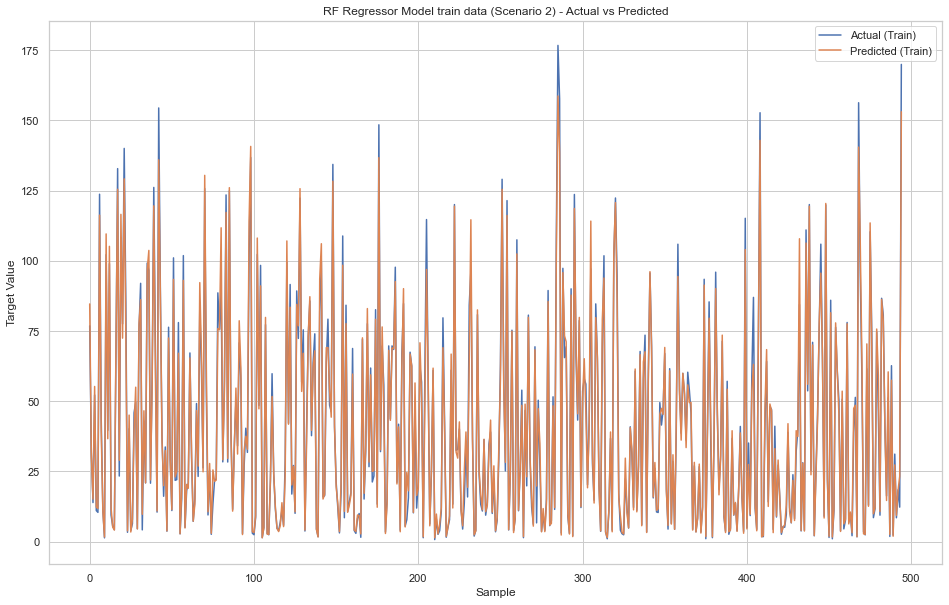

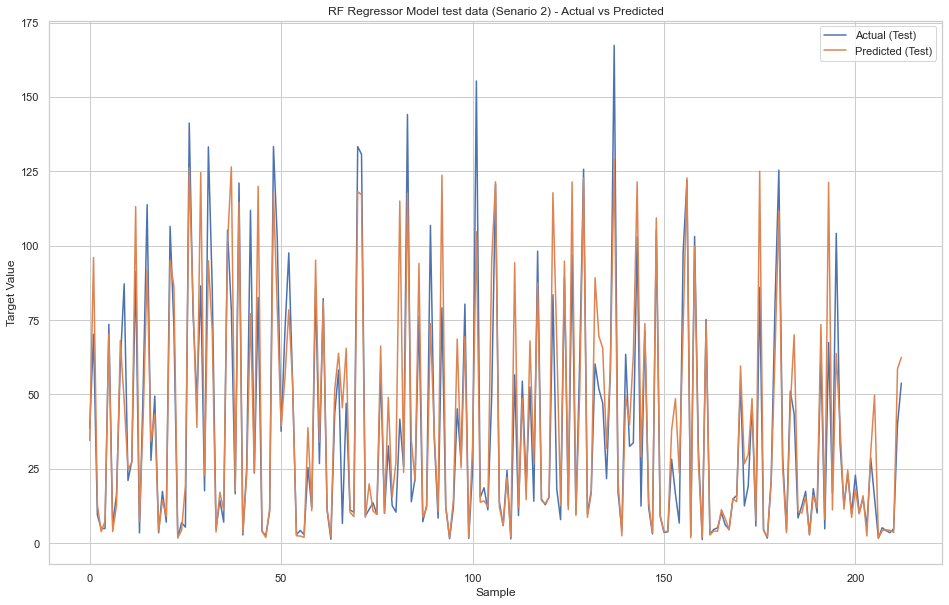

In [486]:
y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

# Calculate the mean squared error (loss) for training and testing
train_loss = mean_absolute_error(y_train, y_train_pred)
test_loss = mean_absolute_error(y_test, y_test_pred)

# Calculate the accuracy as 1 - loss
train_accuracy = 1 - train_loss
test_accuracy = 1 - test_loss

# Plot the training and testing accuracy
plt.figure(figsize=(16, 10))
plt.plot(y_train, label='Actual (Train)')
plt.plot(y_train_pred, label='Predicted (Train)')
plt.xlabel('Sample')
plt.ylabel('Target Value')
plt.title('RF Regressor Model train data (Scenario 2) - Actual vs Predicted')
plt.legend()
plt.show()


plt.figure(figsize=(16, 10))
plt.plot(y_test, label='Actual (Test)')
plt.plot(y_test_pred, label='Predicted (Test)')
plt.xlabel('Sample')
plt.ylabel('Target Value')
plt.title('RF Regressor Model test data (Senario 2) - Actual vs Predicted')
plt.legend()
plt.show()


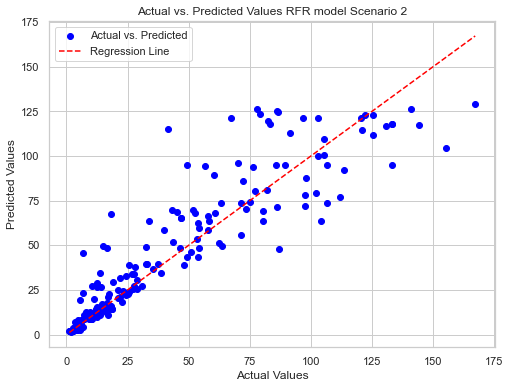

In [487]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Regression Line')
plt.title('Actual vs. Predicted Values RFR model Scenario 2')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [488]:
scores = cross_val_score(rf_model, X_scaled, y, cv=10, scoring='r2')

n = len(y)
p = X.shape[1]  # Number of predictors
adj_r2_scores = 1 - (1 - scores) * (n - 1) / (n - p - 1)

# Print the adjusted R2 scores for each fold
print("Adjusted R2 Scores:", adj_r2_scores)

rfr2_mse_scores = -cross_val_score(rf_model, X_scaled, y, cv=10, scoring='neg_mean_squared_error')
rfr_mse2 = np.mean(rfr2_mse_scores)

rfr_rmse2 = np.mean(np.sqrt(rfr2_mse_scores))

# Calculate and print the mean adjusted R2 score
mean_rf_adj_r2_2 = np.mean(adj_r2_scores)
print("Mean Adjusted R2:", mean_rf_adj_r2_2)

Adjusted R2 Scores: [0.90491944 0.84939543 0.87814065 0.83542956 0.83748566 0.78656658
 0.81292874 0.77275004 0.87306936 0.78737147]
Mean Adjusted R2: 0.8338056931560901


In [489]:
rfr2_mse_scores

array([158.3237934 , 200.84683443, 228.36729497, 211.93437487,
       255.3235166 , 249.00349577, 203.82582403, 167.41423889,
       109.28213054, 226.16864385])

In [490]:
scores = cross_val_score(rf_model, X_scaled, y, cv=10, scoring='neg_mean_absolute_error')

# Convert scores to positive values and calculate RMSE
mae_scores = -scores

# Print the RMSE scores
print("Cross-validated MAE scores:", mae_scores)

# Calculate the mean RMSE
mean_rf_mae_2 = np.mean(mae_scores)
print("Mean MAE:", mean_rf_mae_2)

Cross-validated MAE scores: [ 7.82695457  9.63410601  9.616112    9.48634011  9.89425342  8.85094458
 10.14845411  7.08052491  6.04539865  9.12141234]
Mean MAE: 8.770450070447847


In [491]:
rfr_results_2 = list([mean_rf_mae_2, rfr_rmse2, rfr_mse2, rfr_r2, mean_rf_adj_r2_2])
rfr_results_2

[8.770450070447847,
 14.089154263426632,
 201.04901473354505,
 0.8312259163729078,
 0.8338056931560901]

In [492]:
final_results_1 = pd.DataFrame(columns= ['Model','MAE', 'RMSE', 'MSE', 'R-squared', 'Adjusted R-squared'])
final_results_1 = final_results_1.append(pd.DataFrame([dnn_results_1], columns=['MAE', 'RMSE', 'MSE', 'R-squared', 'Adjusted R-squared']), ignore_index=True)
final_results_1.iloc[0,0] = "Deep Neural Network (DNN)"
final_results_1 = final_results_1.append(pd.DataFrame([svr_results_1], columns=['MAE', 'RMSE', 'MSE', 'R-squared', 'Adjusted R-squared']), ignore_index=True)
final_results_1.iloc[1,0] = "Support Vector Regressor (SVR)"
final_results_1 = final_results_1.append(pd.DataFrame([rfr_results_1], columns=['MAE', 'RMSE', 'MSE', 'R-squared', 'Adjusted R-squared']), ignore_index=True)
final_results_1.iloc[2,0] = "Random Forest Regressor"
final_results_1_error = final_results_1[['Model', 'MAE', 'RMSE', 'MSE']]
final_results_1_score = final_results_1[['Model', 'R-squared', 'Adjusted R-squared']]
final_results_1

,Model,MAE,RMSE,MSE,R-squared,Adjusted R-squared
0,Deep Neural Network (DNN),9.675432,2.240152,14.255098,0.832259,0.805989
1,Support Vector Regressor (SVR),15.638103,12.478556,158.628501,0.658181,0.612594
2,Random Forest Regressor,7.431654,12.054578,148.159763,0.883588,0.861222


In [493]:
final_results_2 = pd.DataFrame(columns= ['Model','MAE', 'RMSE', 'MSE', 'R-squared', 'Adjusted R-squared'])
final_results_2 = final_results_2.append(pd.DataFrame([dnn_results_2], columns=['MAE', 'RMSE', 'MSE', 'R-squared', 'Adjusted R-squared']), ignore_index=True)
final_results_2.iloc[0,0] = "Deep Neural Network (DNN)"
final_results_2 = final_results_2.append(pd.DataFrame([svr_results_2], columns=['MAE', 'RMSE', 'MSE', 'R-squared', 'Adjusted R-squared']), ignore_index=True)
final_results_2.iloc[1,0] = "Support Vector Regressor (SVR)"
final_results_2 = final_results_2.append(pd.DataFrame([rfr_results_2], columns=['MAE', 'RMSE', 'MSE', 'R-squared', 'Adjusted R-squared']), ignore_index=True)
final_results_2.iloc[2,0] = "Random Forest Regressor"
final_results_2_error = final_results_2[['Model', 'MAE', 'RMSE', 'MSE']]
final_results_2_score = final_results_2[['Model', 'R-squared', 'Adjusted R-squared']]
final_results_2

,Model,MAE,RMSE,MSE,R-squared,Adjusted R-squared
0,Deep Neural Network (DNN),12.447676,3.115605,17.459726,0.732265,0.702439
1,Support Vector Regressor (SVR),15.622797,14.264139,205.988905,0.653493,0.612491
2,Random Forest Regressor,8.77045,14.089154,201.049015,0.831226,0.833806


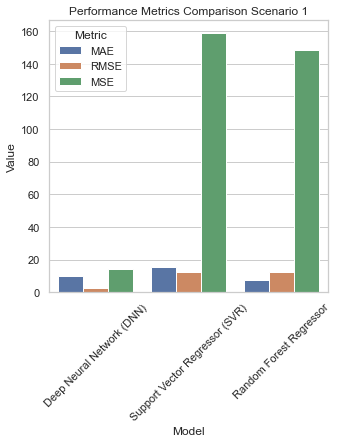

In [495]:
metrics_final1 = final_results_1_error.melt(id_vars='Model', var_name='Metric', value_name='Value')

sns.set(style="whitegrid")
plt.figure(figsize=(5,5))
plt.xticks(rotation=45)
sns.barplot(data=metrics_final1, x='Model', y='Value', hue='Metric')
plt.title('Performance Metrics Comparison Scenario 1')
plt.ylabel('Value')
plt.show()

In [505]:
final_results_1

,Model,MAE,RMSE,MSE,R-squared,Adjusted R-squared
0,Deep Neural Network (DNN),9.675432,2.240152,14.255098,0.832259,0.805989
1,Support Vector Regressor (SVR),15.638103,12.478556,158.628501,0.658181,0.612594
2,Random Forest Regressor,7.431654,12.054578,148.159763,0.883588,0.861222


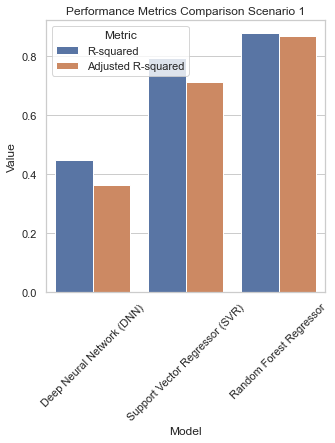

In [259]:
metrics_final1 = final_results_1_score.melt(id_vars='Model', var_name='Metric', value_name='Value')

sns.set(style="whitegrid")
plt.figure(figsize=(5,5))
plt.xticks(rotation=45)
sns.barplot(data=metrics_final1, x='Model', y='Value', hue='Metric')
plt.title('Performance Metrics Comparison Scenario 1')
plt.ylabel('Value')
plt.show()

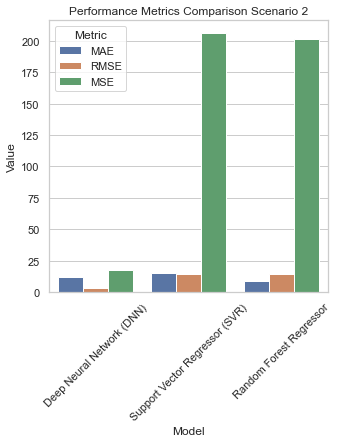

In [496]:
metrics_final2 = final_results_2_error.melt(id_vars='Model', var_name='Metric', value_name='Value')

sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))
plt.xticks(rotation=45)
sns.barplot(data=metrics_final2, x='Model', y='Value', hue='Metric')
plt.title('Performance Metrics Comparison Scenario 2')
plt.ylabel('Value')
plt.show()

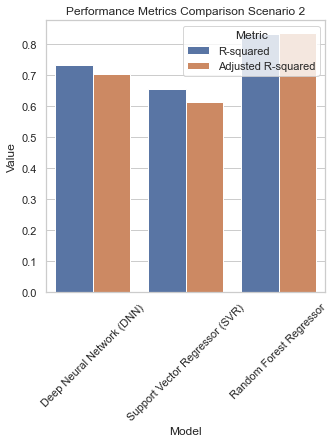

In [507]:
metrics_final2 = final_results_2_score.melt(id_vars='Model', var_name='Metric', value_name='Value')

sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))
plt.xticks(rotation=45)
sns.barplot(data=metrics_final2, x='Model', y='Value', hue='Metric')
plt.title('Performance Metrics Comparison Scenario 2')
plt.ylabel('Value')
plt.show()

# Statistical analysis of evaluation metrics for DNN and Random Forest Regressor

In [560]:
from scipy import stats
dnn_adj_r2_values = adjusted_r2_scores_dnn1
rf_adj_r2_values = list(adj_r2_scores)
t_statistic, p_value = stats.ttest_ind(adjusted_r2_scores_dnn1, adj_r2_scores)

# Print the results
print("Two-sample t-test results:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

Two-sample t-test results:
t-statistic: -1.329754580083486
p-value: 0.20020550914607146


In [499]:
adjusted_r2_scores_dnn1

[0.9007296032729685,
 -0.12833547178215743,
 0.8771325388305397,
 0.8356566902687723,
 0.8466103899378743,
 0.7548105749110594,
 0.7230827467125692,
 0.7001201832743613,
 0.8636265418711431,
 0.6509536938986382]

In [500]:
a = list(adj_r2_scores)
a

[0.904919435762616,
 0.849395428576834,
 0.8781406507642089,
 0.8354295608379756,
 0.8374856569840076,
 0.7865665833866418,
 0.8129287417686515,
 0.7727500399819679,
 0.8730693624232165,
 0.7873714710747799]

In [501]:
adj_r2_scores

array([0.90491944, 0.84939543, 0.87814065, 0.83542956, 0.83748566,
       0.78656658, 0.81292874, 0.77275004, 0.87306936, 0.78737147])